In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
sns.set(style='darkgrid')
from kneed import KneeLocator
from sklearn.metrics import r2_score
from colorama import Fore, Style
from math import ceil, floor

import sys
sys.path.append('../src')
from stock_strategy import stock_strategy
from utils import (
    # stock_trading_strategy,
    # stock_trading_strategy_supp_resist,
    # plot_trading_strategy,
    # download_stock_df,
    # user_function,
    plot_candlestick,
)

## Test effectiveness of support and resistance in option trading

### Strategy 1 - Fail:
* Touch support: long call
* Touch resistance: long put

### Strategy 2:

* Touch support
    * reflect: long call
    * break: long put
* Touch resistance:
    * reflect: long put
    * break: long call
    
#### Key question: how to confirm break / reflect?

* Base assumption: assume the support and resistance to hold, unless strong conflict signal observed.
* Assumption1.1: when going down, a short red line / long green line confirm reflect; long red line confirm break
* Assumption1.2: when going up, a short green line / long red line confirm reflect; long green line confirm break
* ~~Read from 1-min Candlestick~~ -- not applicable
* Check if trend is align with QQQ/SPY

#### Stop revenue needed; for conservative, start with 20%.

#### Precision of level should be relative to the stock price.

#### Hard to validate

### Strategy 3: 

* Touch support - LBB, resistance - UBB

#### Base

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 443.08 ~ up 444.27 , down 440.45
Latest 20 Day MA: 430.44
Latest Lower Bollinger Band, 20MA: 413.36
Latest Higher Bollinger Band, 20MA: 447.53
Latest 50 Day MA: 436.71
Latest Lower Bollinger Band, 50MA: 416.71
Latest Higher Bollinger Band, 50MA: 456.71

Latest RSI: 69.96 
Latest MACD Divergence: 2.11 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 651.9
20MA break point: 429.78
20MA Lower Bollinger Band break point: 410.67
20MA Upper Bollinger Band break point: 448.88
50MA break point: 436.58
50MA Lower Bollinger Band break point: 414.84
50MA Upper Bollinger Band break point: 458.31
[[333.84700012]
 [351.77249908]
 [362.8921288 ]
 [372.62456927]
 [385.10791651]
 [400.65875053]
 [409.77999878]
 [422.57791773]
 [433.6803431 ]
 [440.45582962]]
[[335.74499893]
 [354.39894827]
 [364.14055379]
 [372.09416792]
 [380.17583211]
 [391.10791906]
 [408.8290

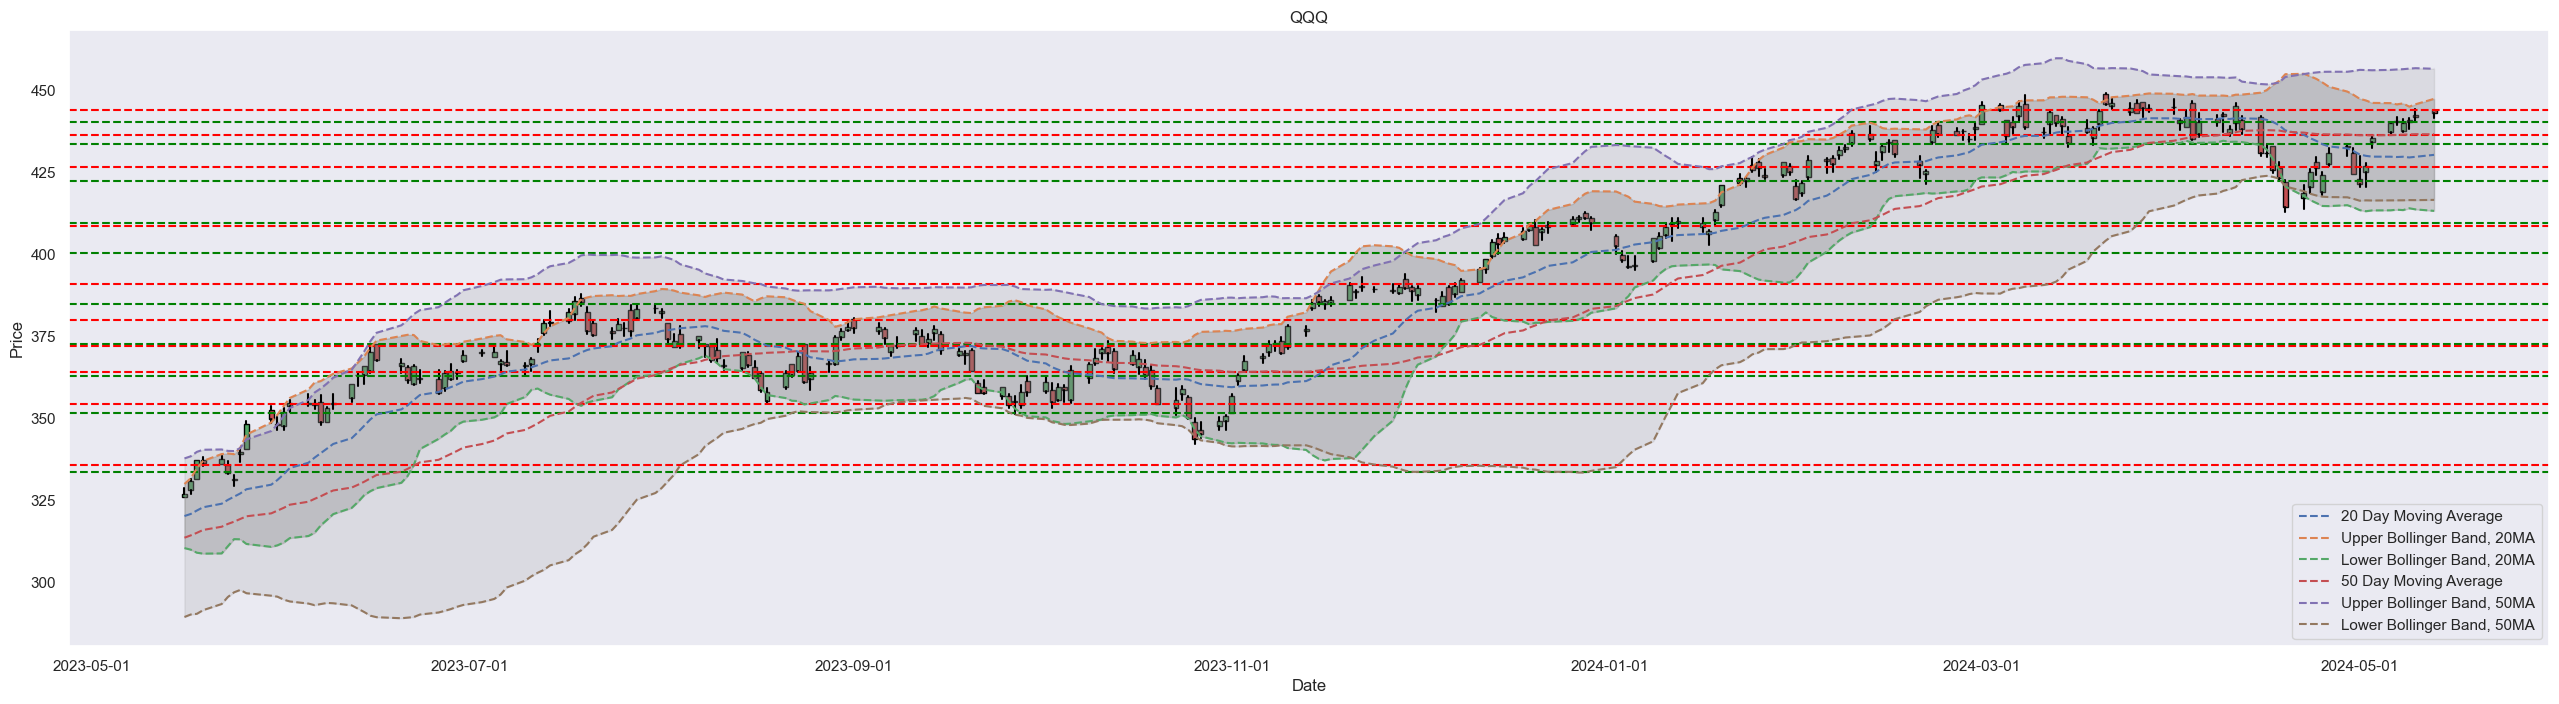

In [2]:
stock_strategy('qqq', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('qqq').latest_metric()
stock_strategy('qqq').infer_metric()

[*********************100%%**********************]  1 of 1 completed
Break all resistance; record max stock price
* previous stock price closing 520.91 ~ up 524.61 , down 517.98
Latest 20 Day MA: 508.14
Latest Lower Bollinger Band, 20MA: 491.9
Latest Higher Bollinger Band, 20MA: 524.38
Latest 50 Day MA: 512.84
Latest Lower Bollinger Band, 50MA: 494.36
Latest Higher Bollinger Band, 50MA: 531.32

Latest RSI: 69.56 
Latest MACD Divergence: 2.03 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 677.57
20MA break point: 507.47
20MA Lower Bollinger Band break point: 489.47
20MA Upper Bollinger Band break point: 525.47
50MA break point: 512.68
50MA Lower Bollinger Band break point: 492.71
50MA Upper Bollinger Band break point: 532.65
[[414.41736804]
 [424.59545344]
 [434.15513652]
 [443.73249912]
 [452.89360894]
 [470.99920166]
 [486.82461548]
 [498.41237531]
 [509.06120117]
 [517.98578845]]
[[418.622779  ]
 [429.10636486]
 [437.77676302]
 [447.6925651

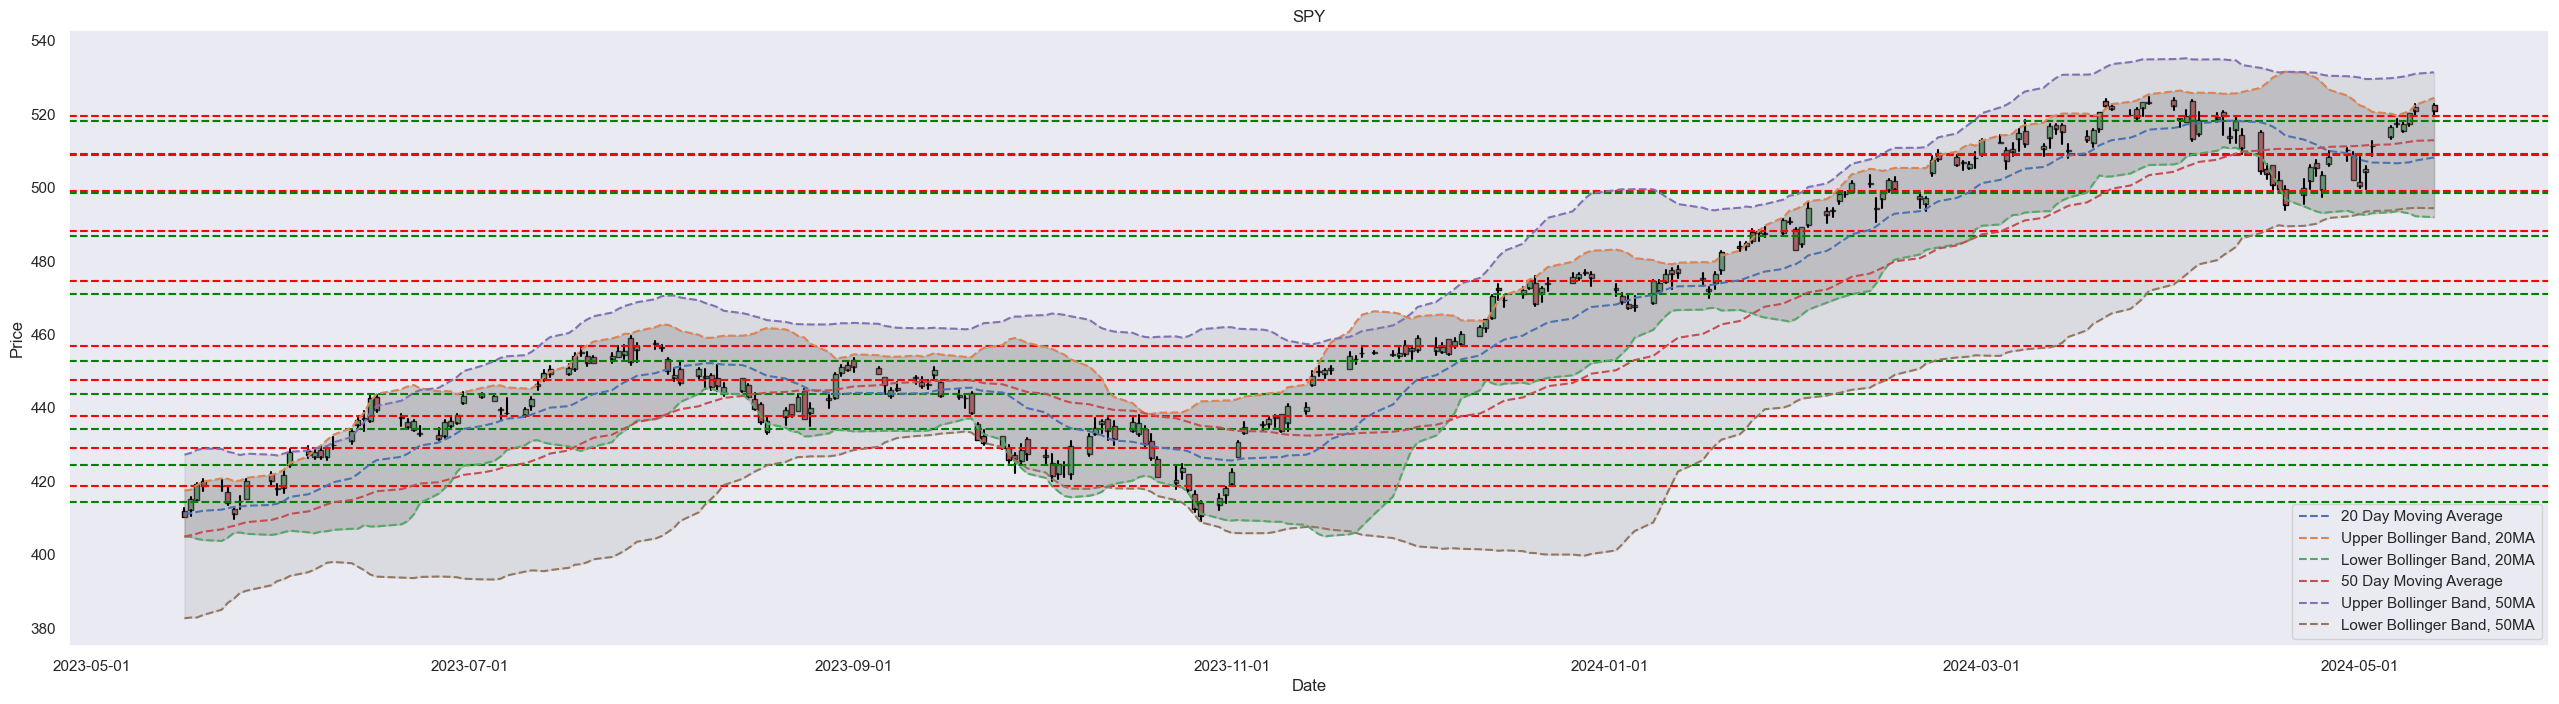

In [3]:
stock_strategy('spy', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('spy').latest_metric()
stock_strategy('spy').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 220.7 ~ up 228.58 , down 214.95
Latest 20 Day MA: 213.1
Latest Lower Bollinger Band, 20MA: 199.81
Latest Higher Bollinger Band, 20MA: 226.38
Latest 50 Day MA: 219.6
Latest Lower Bollinger Band, 50MA: 200.46
Latest Higher Bollinger Band, 50MA: 238.73

Latest RSI: 66.87 
Latest MACD Divergence: 1.22 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 437.35
20MA break point: 212.7
20MA Lower Bollinger Band break point: 197.43
20MA Upper Bollinger Band break point: 227.96
50MA break point: 219.57
50MA Lower Bollinger Band break point: 198.64
50MA Upper Bollinger Band break point: 240.51
[[145.64512634]
 [156.01120461]
 [162.20250092]
 [169.26101452]
 [177.33484996]
 [186.16555583]
 [196.57562542]
 [205.38648139]
 [214.95318736]
 [223.08304231]]
[[147.87230858]
 [158.64707114]
 [165.28634048]
 [171.75579701]
 [179.12142944]
 [190.10650253]
 [201.5469231

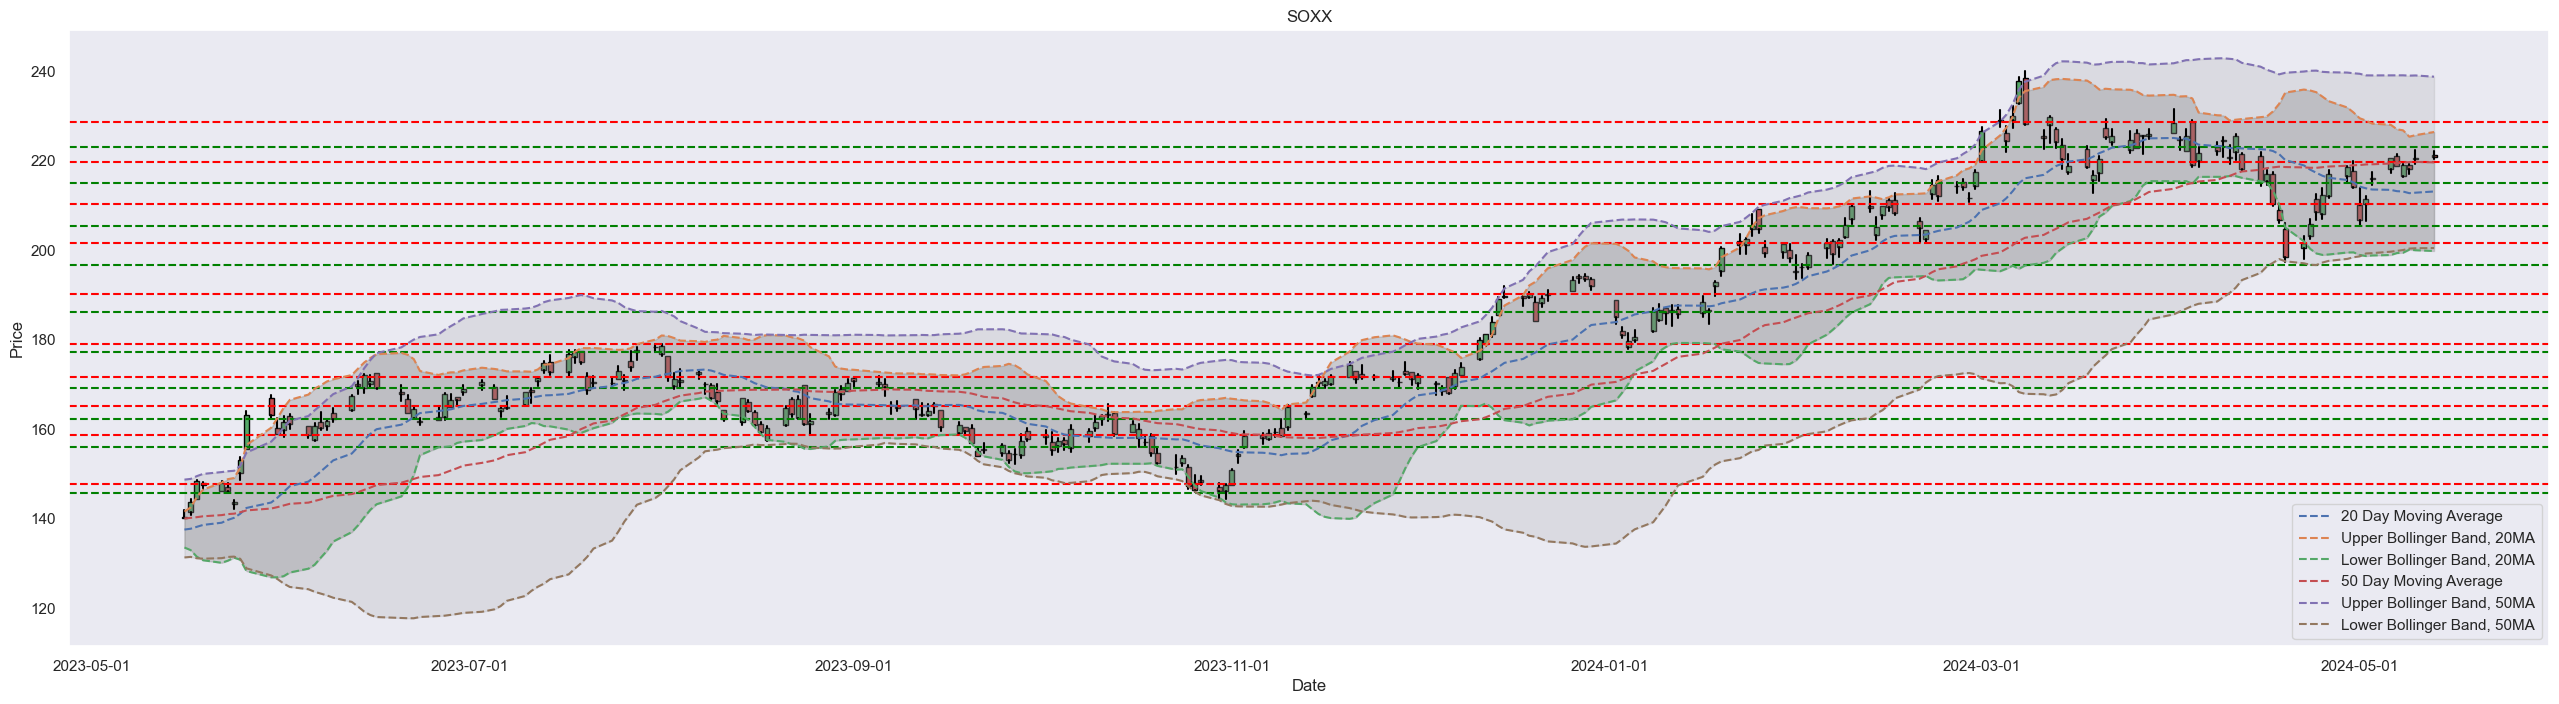

In [4]:
stock_strategy('soxx', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('soxx').latest_metric()
stock_strategy('soxx').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 903.99 ~ up 935.44 , down 888.63
Latest 20 Day MA: 859.12
Latest Lower Bollinger Band, 20MA: 773.0
Latest Higher Bollinger Band, 20MA: 945.24
Latest 50 Day MA: 878.37
Latest Lower Bollinger Band, 50MA: 785.7
Latest Higher Bollinger Band, 50MA: 971.03

Latest RSI: 63.43 
Latest MACD Divergence: 5.56 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 1545.52
20MA break point: 856.76
20MA Lower Bollinger Band break point: 757.14
20MA Upper Bollinger Band break point: 956.37
50MA break point: 877.84
50MA Lower Bollinger Band break point: 776.96
50MA Upper Bollinger Band break point: 978.72
[[300.87857056]
 [405.5899981 ]
 [443.68617887]
 [478.05042608]
 [545.05125427]
 [608.22299805]
 [693.71916707]
 [776.70249939]
 [845.65454102]
 [888.63304072]]
[[309.8457162 ]
 [423.60131186]
 [463.15384439]
 [493.22119068]
 [557.35286168]
 [622.8490878 ]
 [719.9733

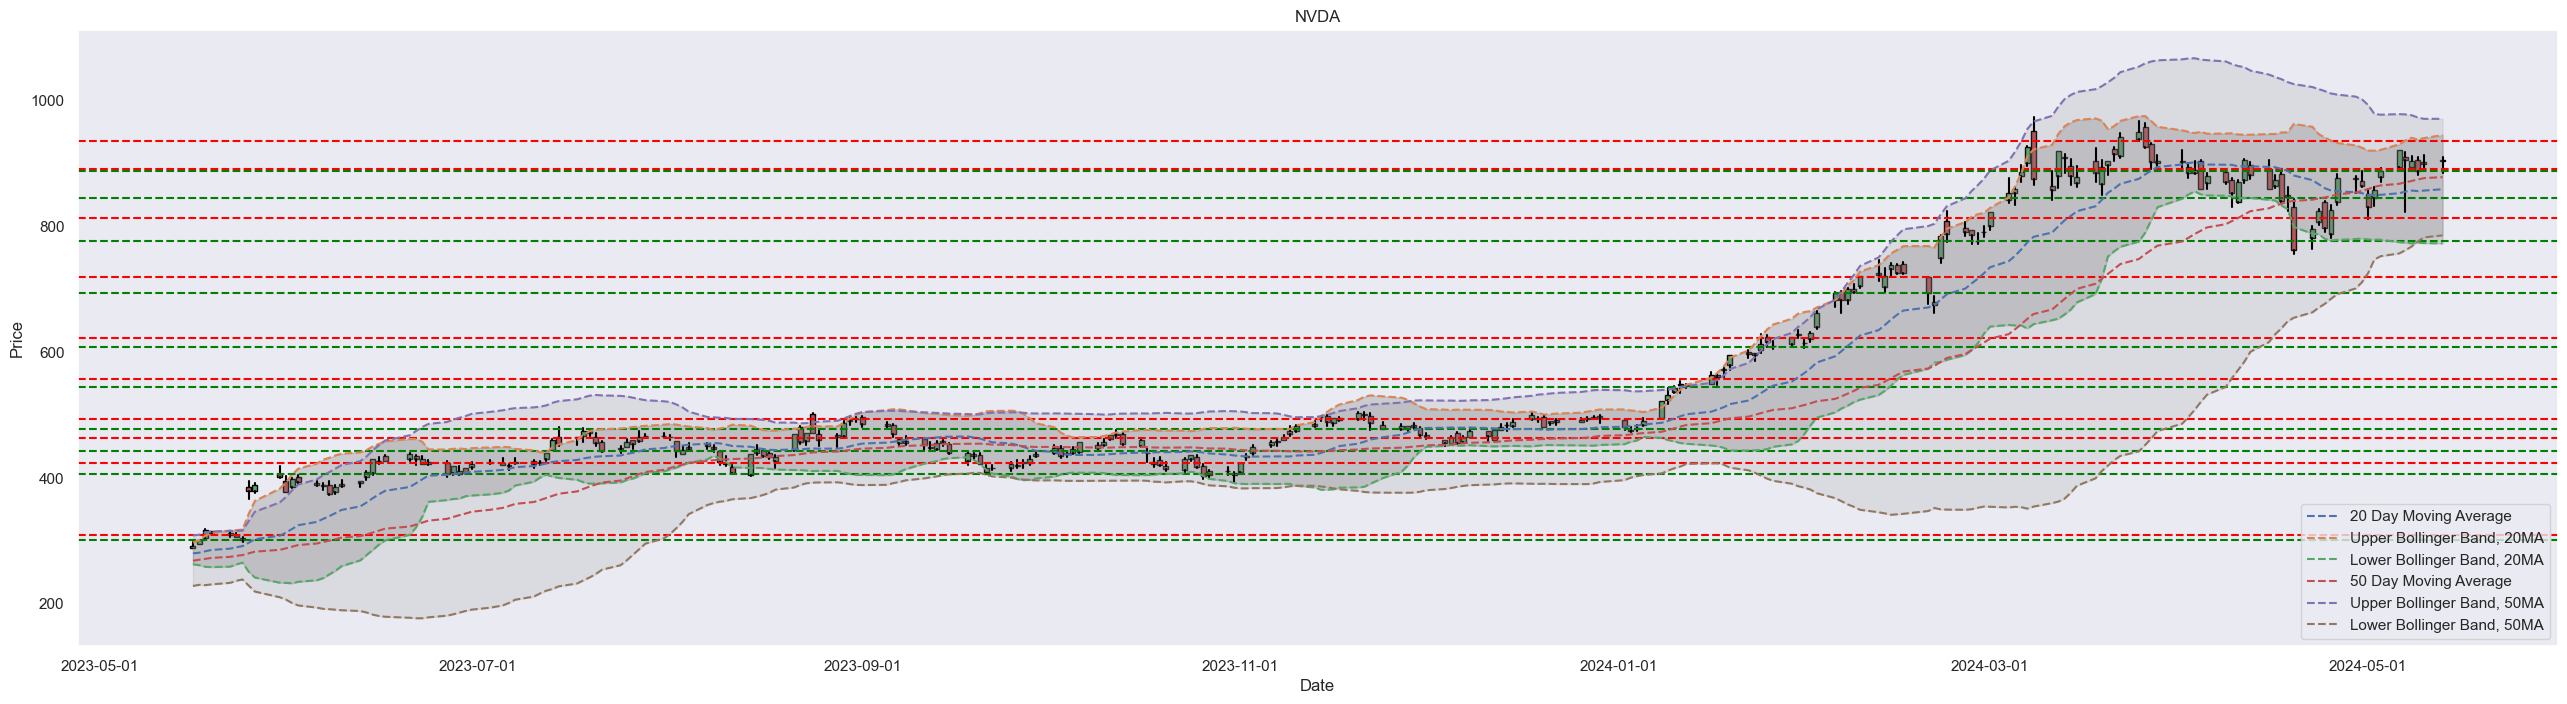

In [5]:
stock_strategy('nvda', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('nvda').latest_metric()
stock_strategy('nvda').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 216.26 ~ up 216.55 , down 214.9
Latest 20 Day MA: 216.14
Latest Lower Bollinger Band, 20MA: 210.62
Latest Higher Bollinger Band, 20MA: 221.66
Latest 50 Day MA: 210.01
Latest Lower Bollinger Band, 50MA: 190.2
Latest Higher Bollinger Band, 50MA: 229.82

Latest RSI: 52.86 
Latest MACD Divergence: -0.36 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 12.06
20MA break point: 216.13
20MA Lower Bollinger Band break point: 209.55
20MA Upper Bollinger Band break point: 222.72
50MA break point: 209.89
50MA Lower Bollinger Band break point: 188.35
50MA Upper Bollinger Band break point: 231.42
[[170.86000061]
 [177.23909066]
 [180.54869644]
 [183.416579  ]
 [187.58760132]
 [191.00125122]
 [199.83117766]
 [210.51111348]
 [214.90529408]
 [218.95400085]]
[[171.94272822]
 [178.4880395 ]
 [181.95526244]
 [184.54457092]
 [188.46816394]
 [192.13499996]
 [201.62388

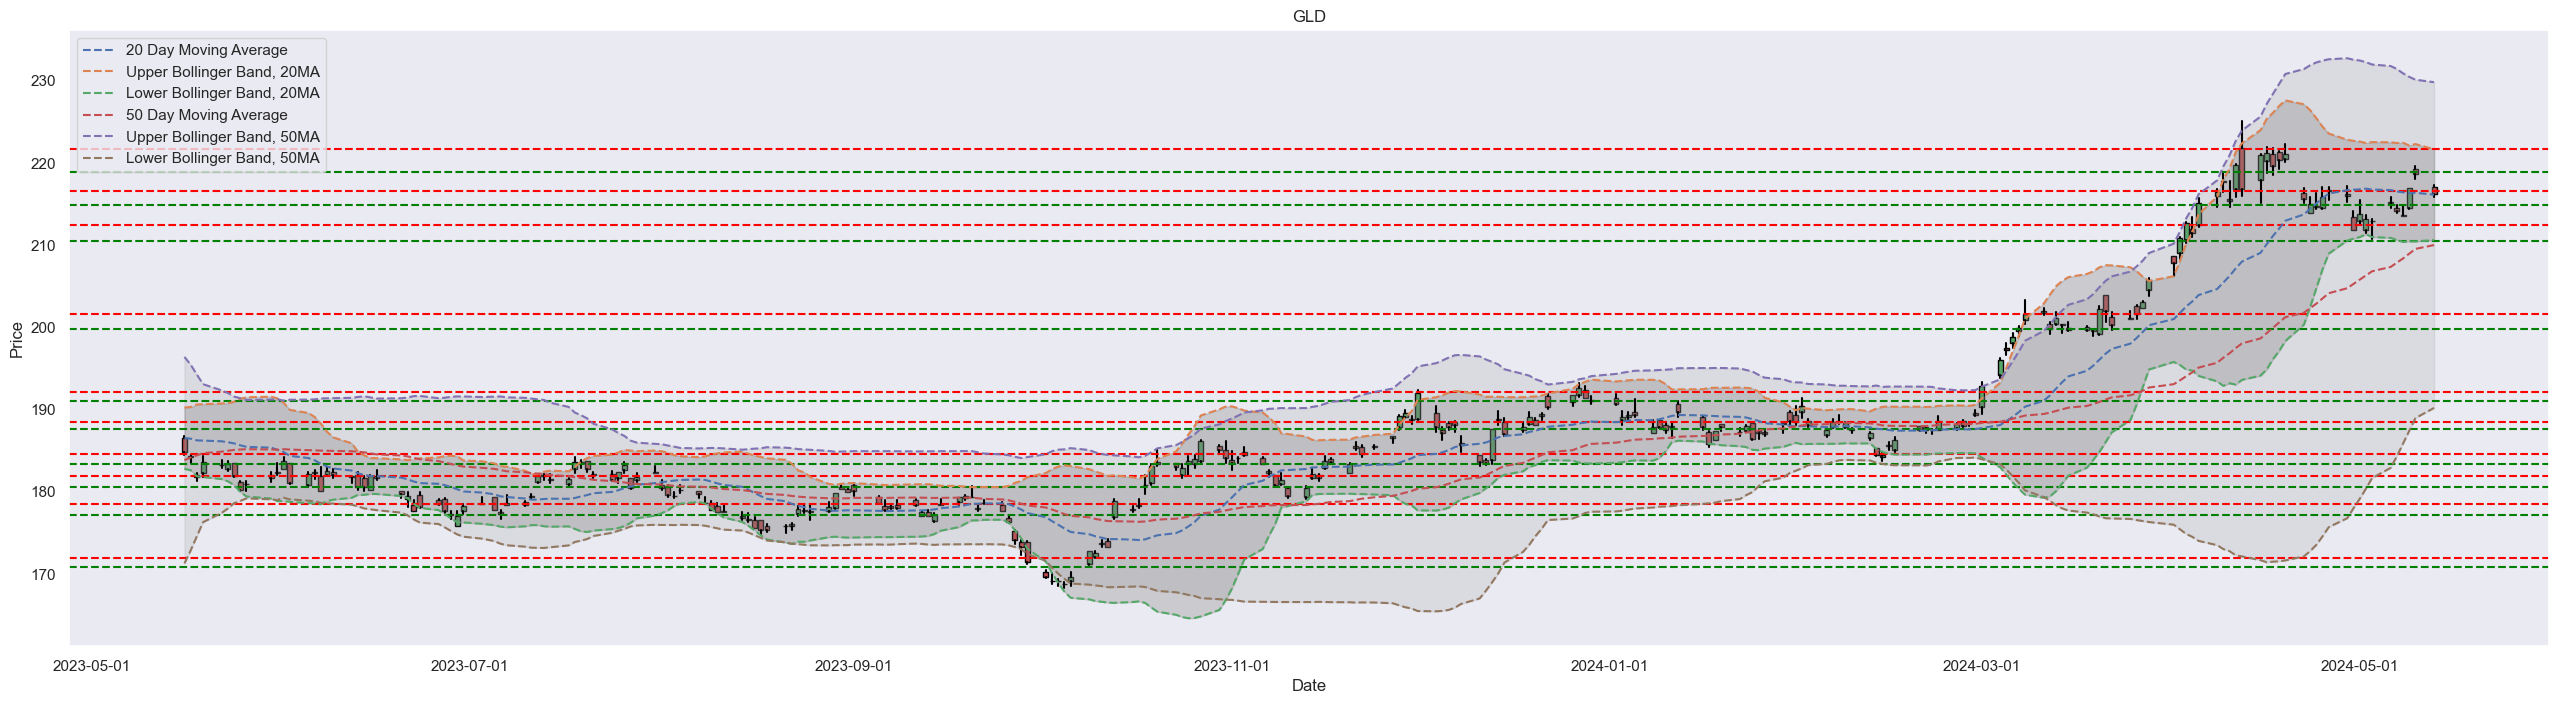

In [6]:
stock_strategy('gld', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('gld').latest_metric()
stock_strategy('gld').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 93.58 ~ up 96.94 , down 92.21
Latest 20 Day MA: 94.3
Latest Lower Bollinger Band, 20MA: 91.5
Latest Higher Bollinger Band, 20MA: 97.1
Latest 50 Day MA: 93.46
Latest Lower Bollinger Band, 50MA: 85.84
Latest Higher Bollinger Band, 50MA: 101.09

Latest RSI: 37.17 
Latest MACD Divergence: -0.22 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 65.54
20MA break point: 94.34
20MA Lower Bollinger Band break point: 91.02
20MA Upper Bollinger Band break point: 97.66
50MA break point: 93.46
50MA Lower Bollinger Band break point: 85.12
50MA Upper Bollinger Band break point: 101.8
[[69.59760071]
 [73.70941162]
 [77.30679977]
 [80.12338468]
 [82.85205454]
 [84.84202403]
 [87.15984579]
 [89.46921554]
 [92.21814   ]
 [95.88266703]]
[[70.41749954]
 [73.53650055]
 [77.7367648 ]
 [80.23145803]
 [82.67135607]
 [85.02402295]
 [87.21258823]
 [89.96764654]
 [92.9346669

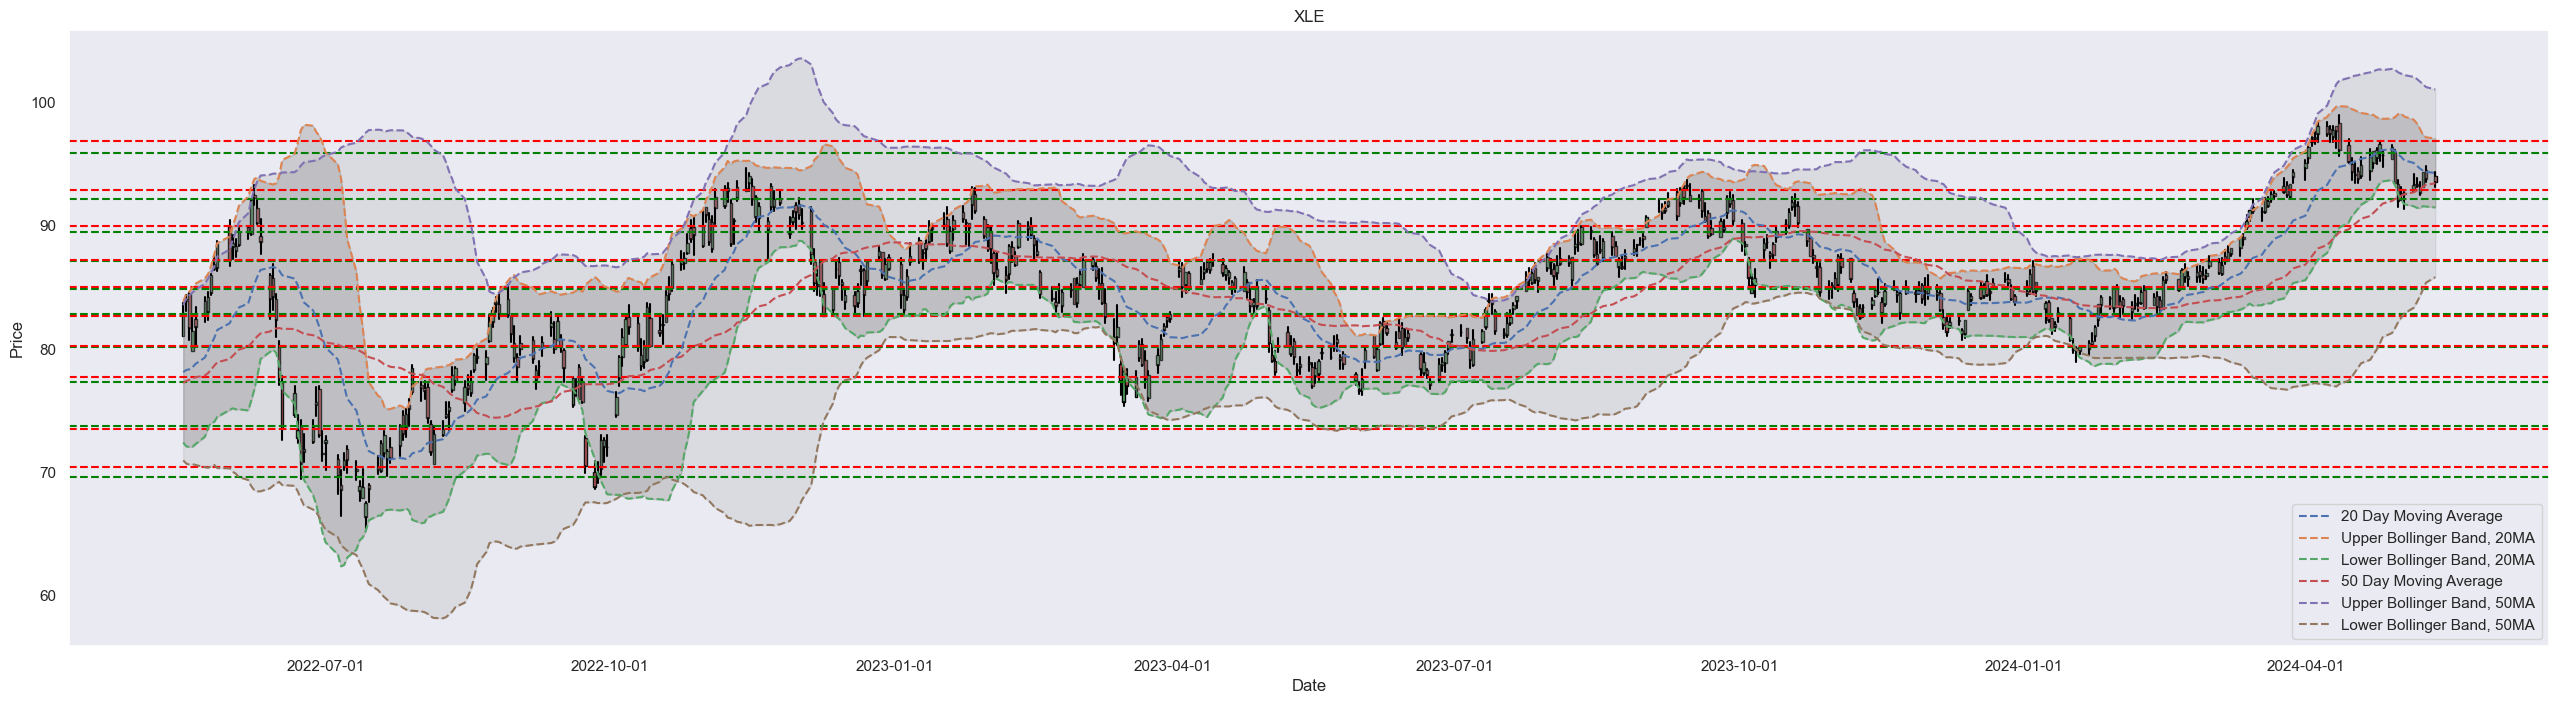

In [7]:
stock_strategy('xle').output(strategy='daily')
stock_strategy('xle').latest_metric()
stock_strategy('xle').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 31.24 ~ up 32.36 , down 29.91
Latest 20 Day MA: 28.38
Latest Lower Bollinger Band, 20MA: 24.59
Latest Higher Bollinger Band, 20MA: 32.16
Latest 50 Day MA: 27.11
Latest Lower Bollinger Band, 50MA: 22.94
Latest Higher Bollinger Band, 50MA: 31.28

Latest RSI: 74.17 
Latest MACD Divergence: 0.2 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 28.23
20MA Lower Bollinger Band break point: 24.0
20MA Upper Bollinger Band break point: 32.45
50MA break point: 27.03
50MA Lower Bollinger Band break point: 22.76
50MA Upper Bollinger Band break point: 31.29
[[19.25      ]
 [21.79166654]
 [23.84592593]
 [25.22196003]
 [26.43353261]
 [27.50779607]
 [28.69598141]
 [29.91095782]
 [31.64073523]
 [34.01895857]]
[[20.45718193]
 [23.00000022]
 [24.61988456]
 [25.83851016]
 [26.88534193]
 [27.94374286]
 [29.20001541]
 [30.66535824]
 [32.35707325]
 [34.88903823]]
[********

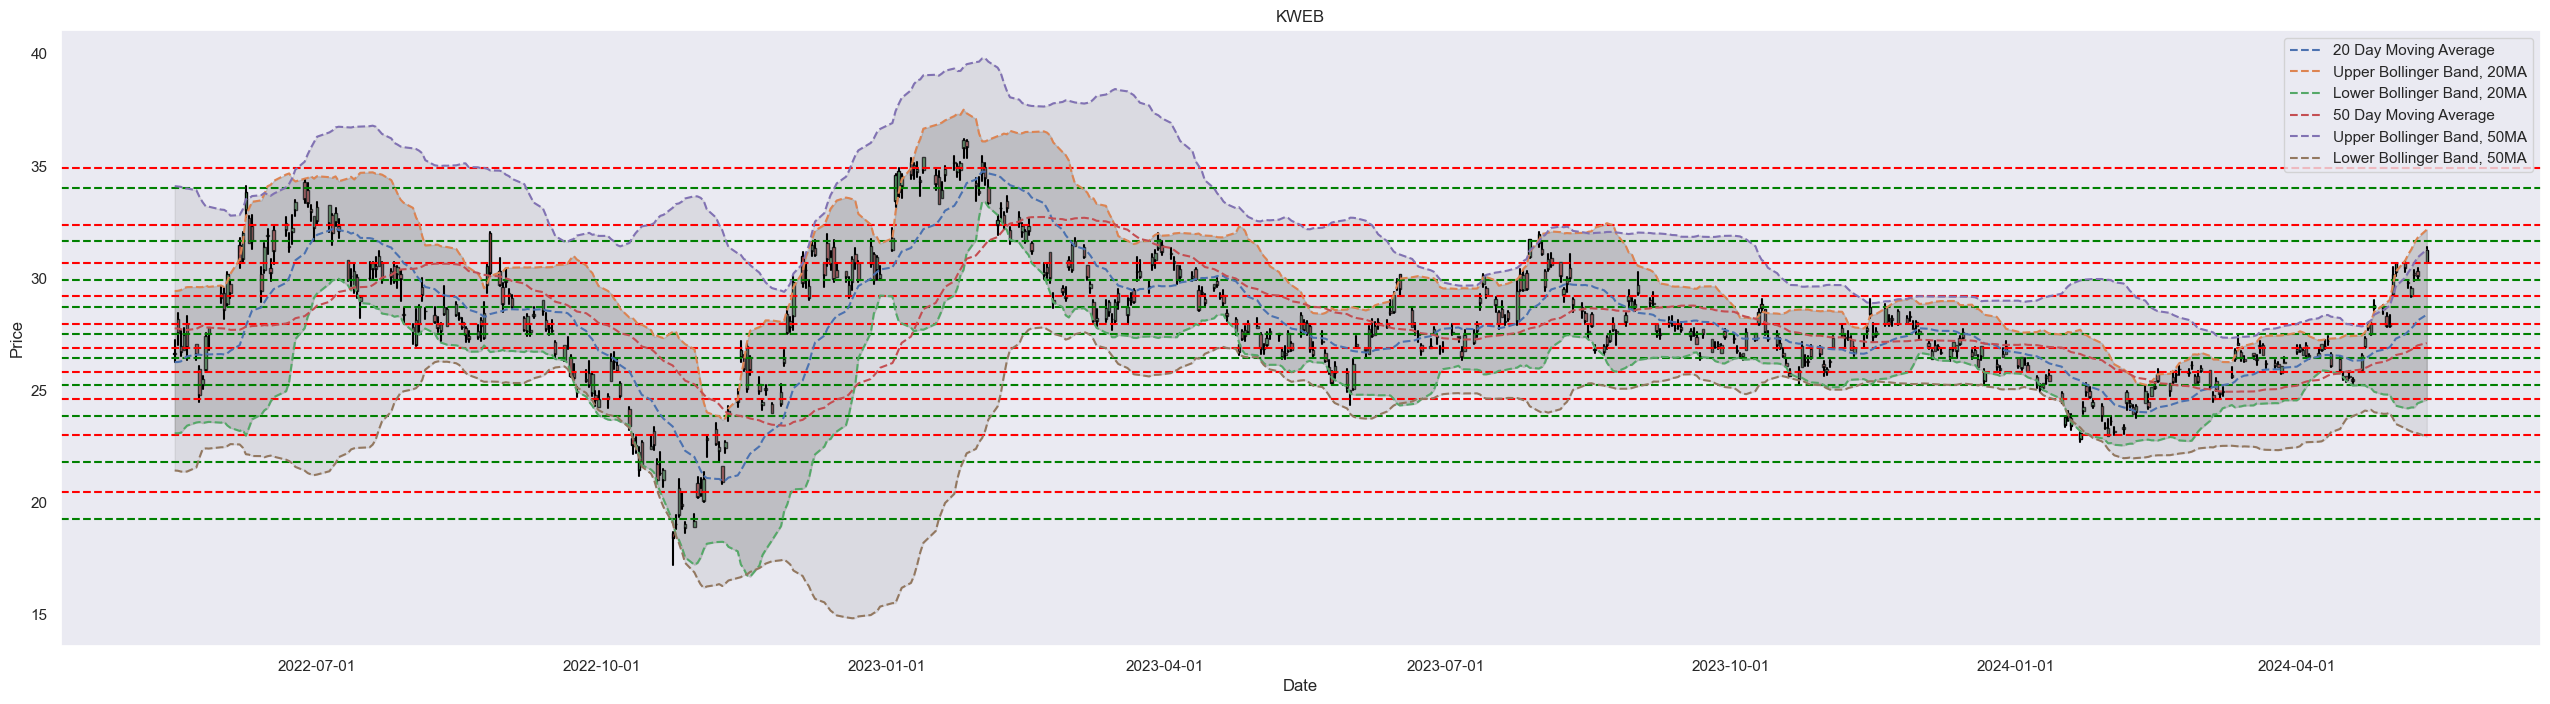

In [8]:
stock_strategy('kweb').output(strategy='daily')
stock_strategy('kweb').latest_metric()
stock_strategy('kweb').infer_metric()

#### Leveraged

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 59.56 ~ up 60.41 , down 58.43
Latest 20 Day MA: 55.06
Latest Lower Bollinger Band, 20MA: 48.97
Latest Higher Bollinger Band, 20MA: 61.15
Latest 50 Day MA: 58.28
Latest Lower Bollinger Band, 50MA: 49.52
Latest Higher Bollinger Band, 50MA: 67.04

Latest RSI: 68.75 
Latest MACD Divergence: 0.83 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 166.9
20MA break point: 54.82
20MA Lower Bollinger Band break point: 48.01
20MA Upper Bollinger Band break point: 61.64
50MA break point: 58.26
50MA Lower Bollinger Band break point: 48.68
50MA Upper Bollinger Band break point: 67.83
[[31.2993337 ]
 [35.39457147]
 [38.64090893]
 [41.78176476]
 [44.58000011]
 [48.72499975]
 [51.78133341]
 [55.07888858]
 [58.4300002 ]
 [61.25545467]]
[[31.89833323]
 [36.36833318]
 [39.5799997 ]
 [42.40705883]
 [45.41620675]
 [50.69521746]
 [54.83642769]
 [57.73190453]
 [60.408147

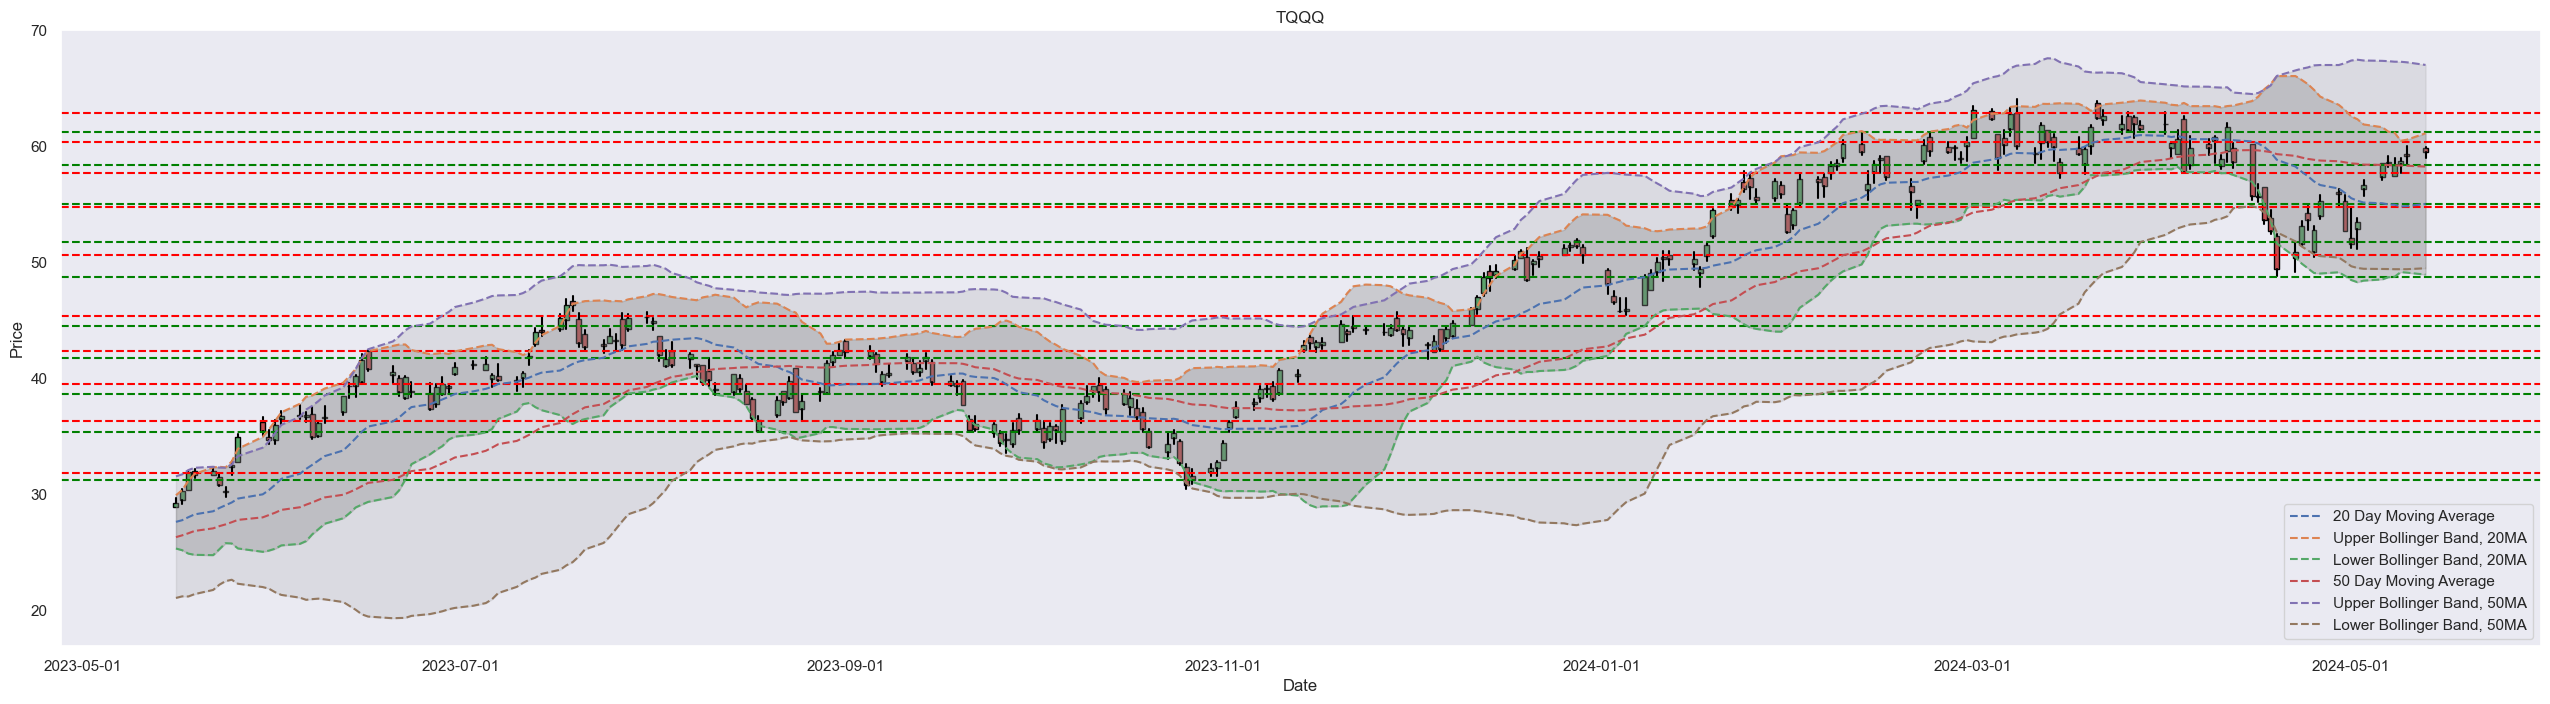

In [9]:
stock_strategy('tqqq', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('tqqq').latest_metric()
stock_strategy('tqqq').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 68.19 ~ up 69.79 , down 65.45
Latest 20 Day MA: 63.72
Latest Lower Bollinger Band, 20MA: 58.01
Latest Higher Bollinger Band, 20MA: 69.43
Latest 50 Day MA: 66.12
Latest Lower Bollinger Band, 50MA: 58.49
Latest Higher Bollinger Band, 50MA: 73.75

Latest RSI: 67.92 
Latest MACD Divergence: 0.77 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 148.22
20MA break point: 63.48
20MA Lower Bollinger Band break point: 57.15
20MA Upper Bollinger Band break point: 69.82
50MA break point: 66.08
50MA Lower Bollinger Band break point: 57.77
50MA Upper Bollinger Band break point: 74.38
[[38.76928561]
 [42.13464342]
 [45.0721209 ]
 [47.54609764]
 [50.36133347]
 [53.49272693]
 [58.35823553]
 [61.60100002]
 [65.45571395]
 [68.83384587]]
[[39.91814846]
 [43.35419353]
 [46.30806449]
 [48.41756759]
 [50.76842117]
 [54.46416696]
 [58.90583324]
 [62.88307733]
 [66.90782

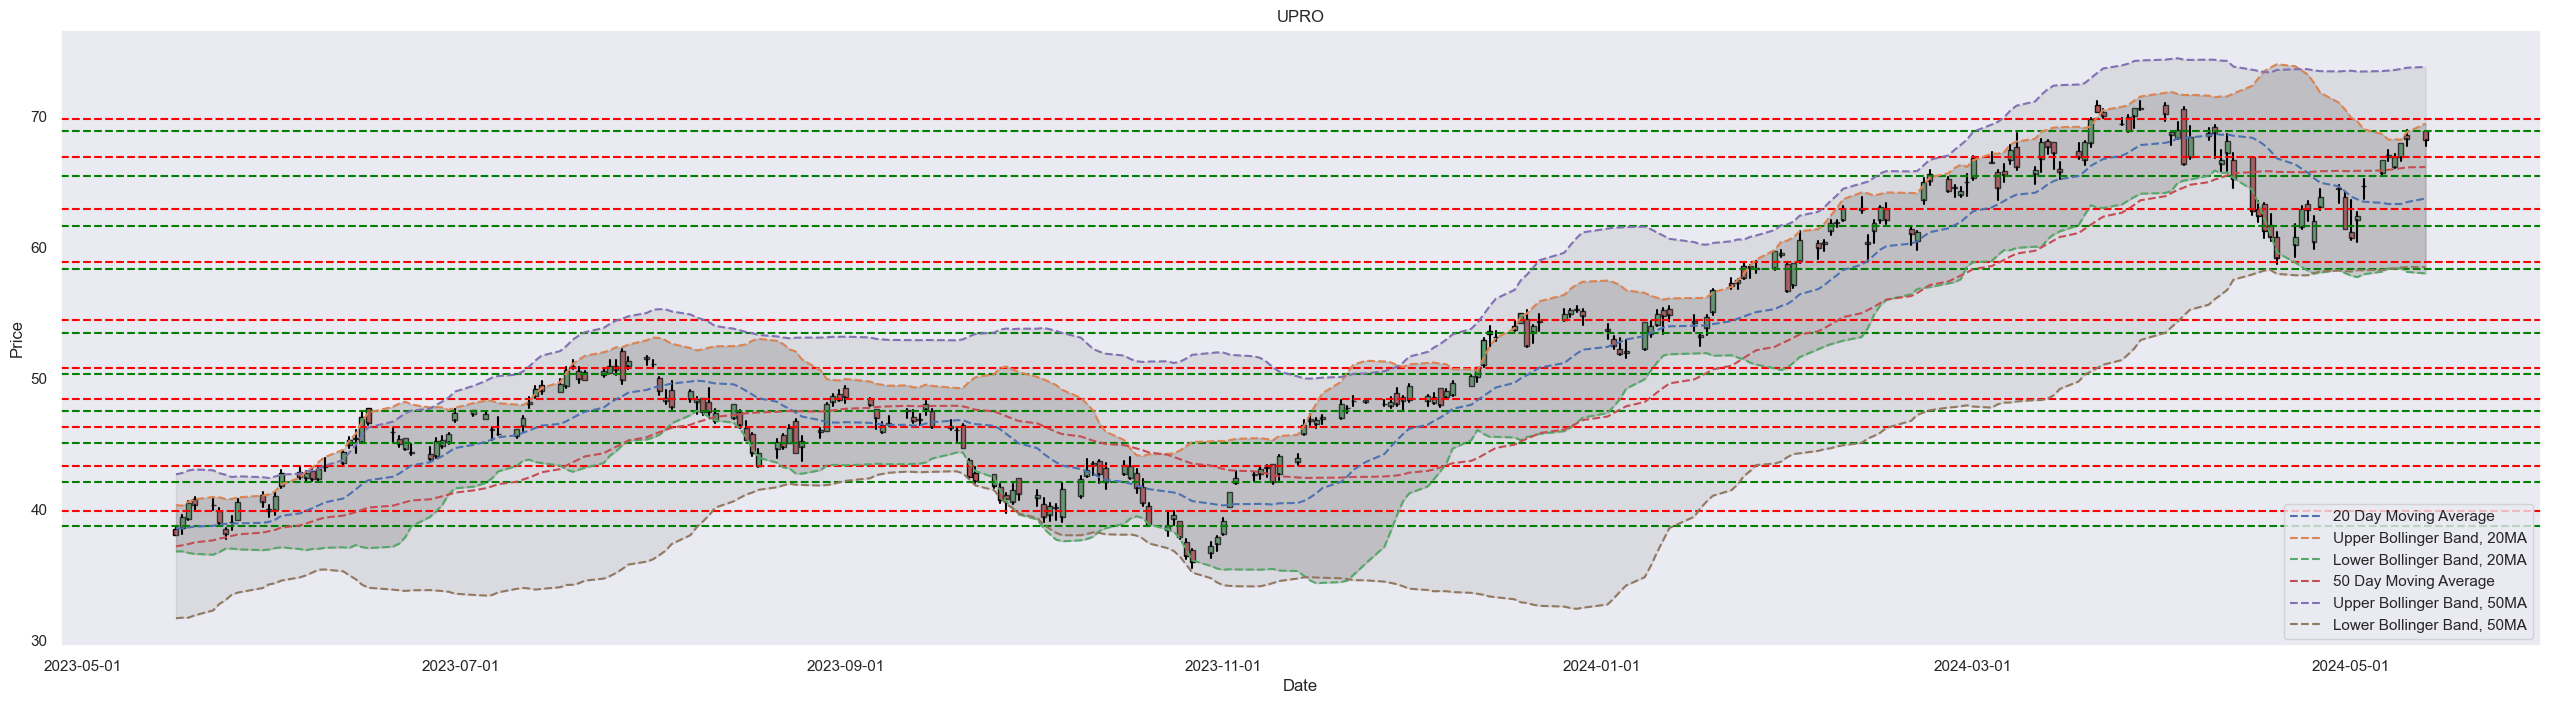

In [10]:
stock_strategy('upro', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('upro').latest_metric()
stock_strategy('upro').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 41.27 ~ up 41.79 , down 39.25
Latest 20 Day MA: 37.75
Latest Lower Bollinger Band, 20MA: 31.31
Latest Higher Bollinger Band, 20MA: 44.2
Latest 50 Day MA: 42.49
Latest Lower Bollinger Band, 50MA: 29.94
Latest Higher Bollinger Band, 50MA: 55.05

Latest RSI: 65.97 
Latest MACD Divergence: 0.68 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 199.16
20MA break point: 37.57
20MA Lower Bollinger Band break point: 30.14
20MA Upper Bollinger Band break point: 45.0
50MA break point: 42.52
50MA Lower Bollinger Band break point: 28.79
50MA Upper Bollinger Band break point: 56.24
[[15.57470585]
 [18.25647062]
 [21.30695654]
 [23.70684207]
 [26.7962501 ]
 [30.74687481]
 [34.37285687]
 [39.25999979]
 [43.91363612]
 [49.06800003]]
[[16.96136353]
 [19.77866675]
 [22.80326084]
 [25.37076931]
 [29.3592307 ]
 [34.34368415]
 [38.17285701]
 [41.78960007]
 [47.1786362

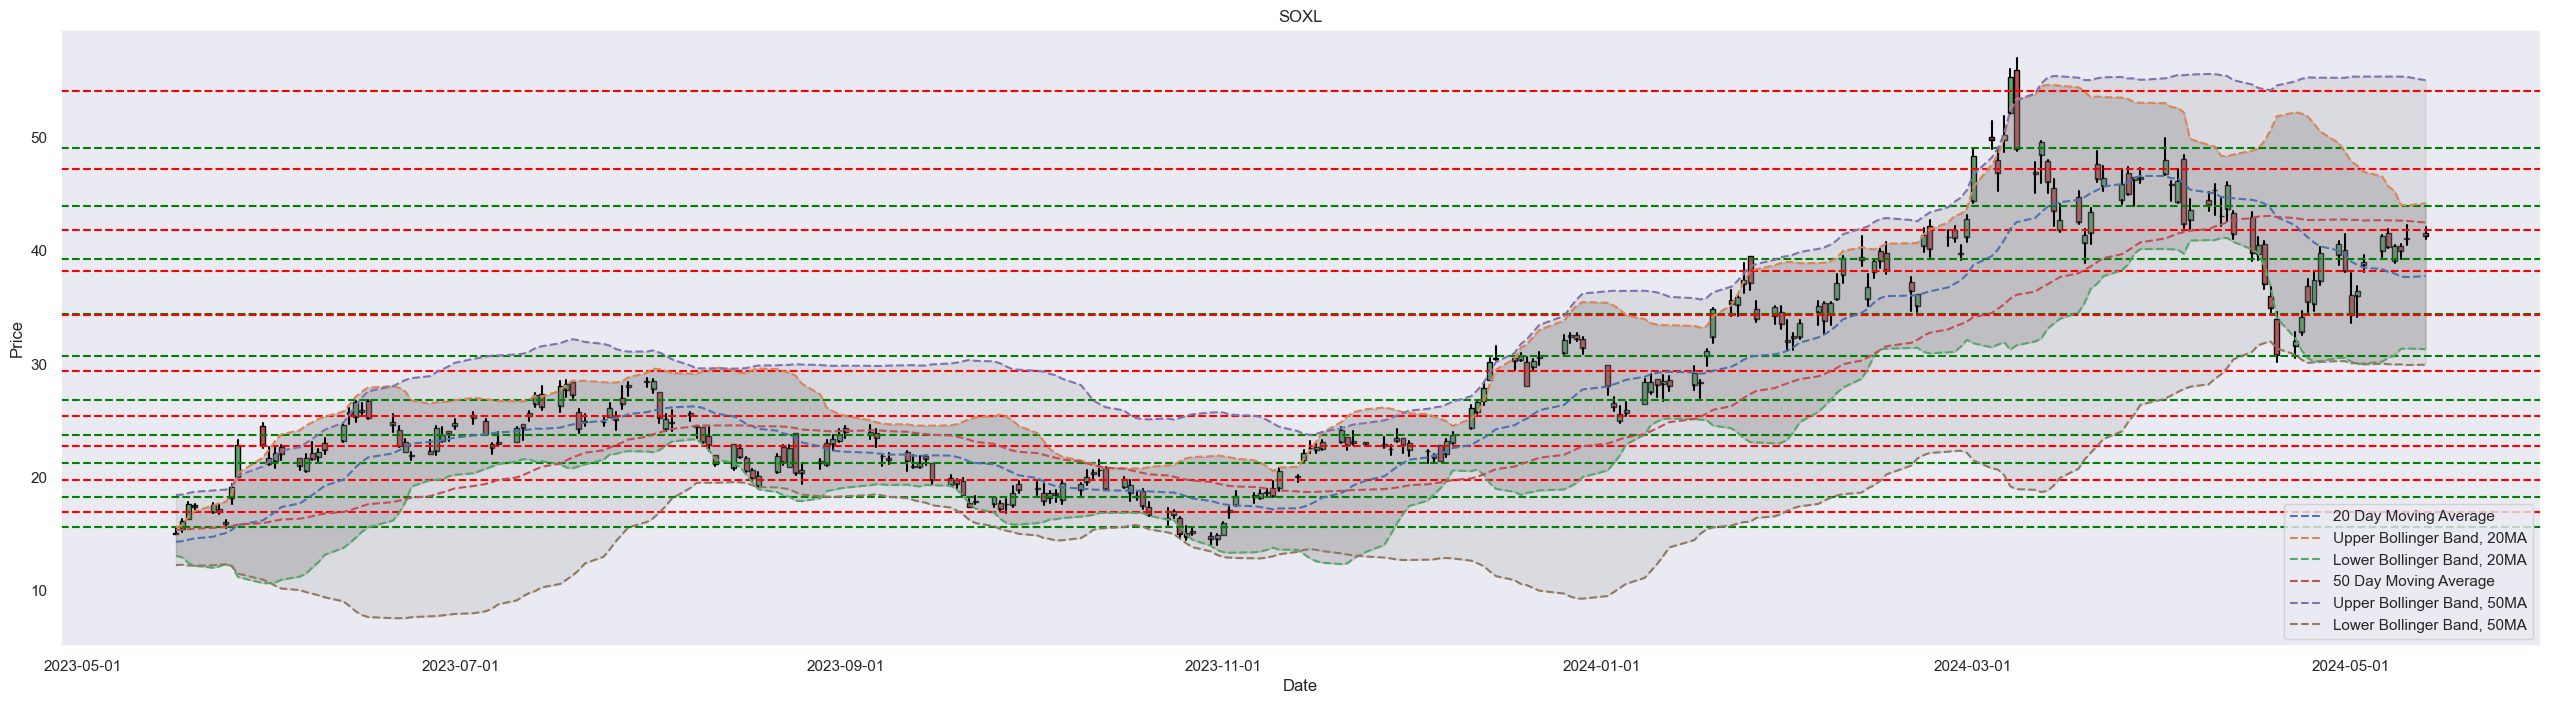

In [11]:
stock_strategy('soxl', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('soxl').latest_metric()
stock_strategy('soxl').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 39.45 ~ up 41.56 , down 39.44
Latest 20 Day MA: 36.21
Latest Lower Bollinger Band, 20MA: 29.56
Latest Higher Bollinger Band, 20MA: 42.86
Latest 50 Day MA: 38.91
Latest Lower Bollinger Band, 50MA: 29.98
Latest Higher Bollinger Band, 50MA: 47.85

Latest RSI: 62.02 
Latest MACD Divergence: 0.49 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 129.63
20MA break point: 36.04
20MA Lower Bollinger Band break point: 28.32
20MA Upper Bollinger Band break point: 43.76
50MA break point: 38.9
50MA Lower Bollinger Band break point: 29.13
50MA Upper Bollinger Band break point: 48.68
[[14.4341253 ]
 [16.64041668]
 [20.31798363]
 [24.88428552]
 [28.42168469]
 [31.85179668]
 [34.70728574]
 [37.51972241]
 [39.44428526]
 [42.89673309]]
[[14.81011908]
 [17.09785438]
 [21.13958359]
 [26.09458319]
 [29.57750034]
 [34.42534696]
 [39.15047073]
 [41.55226669]
 [43.884860

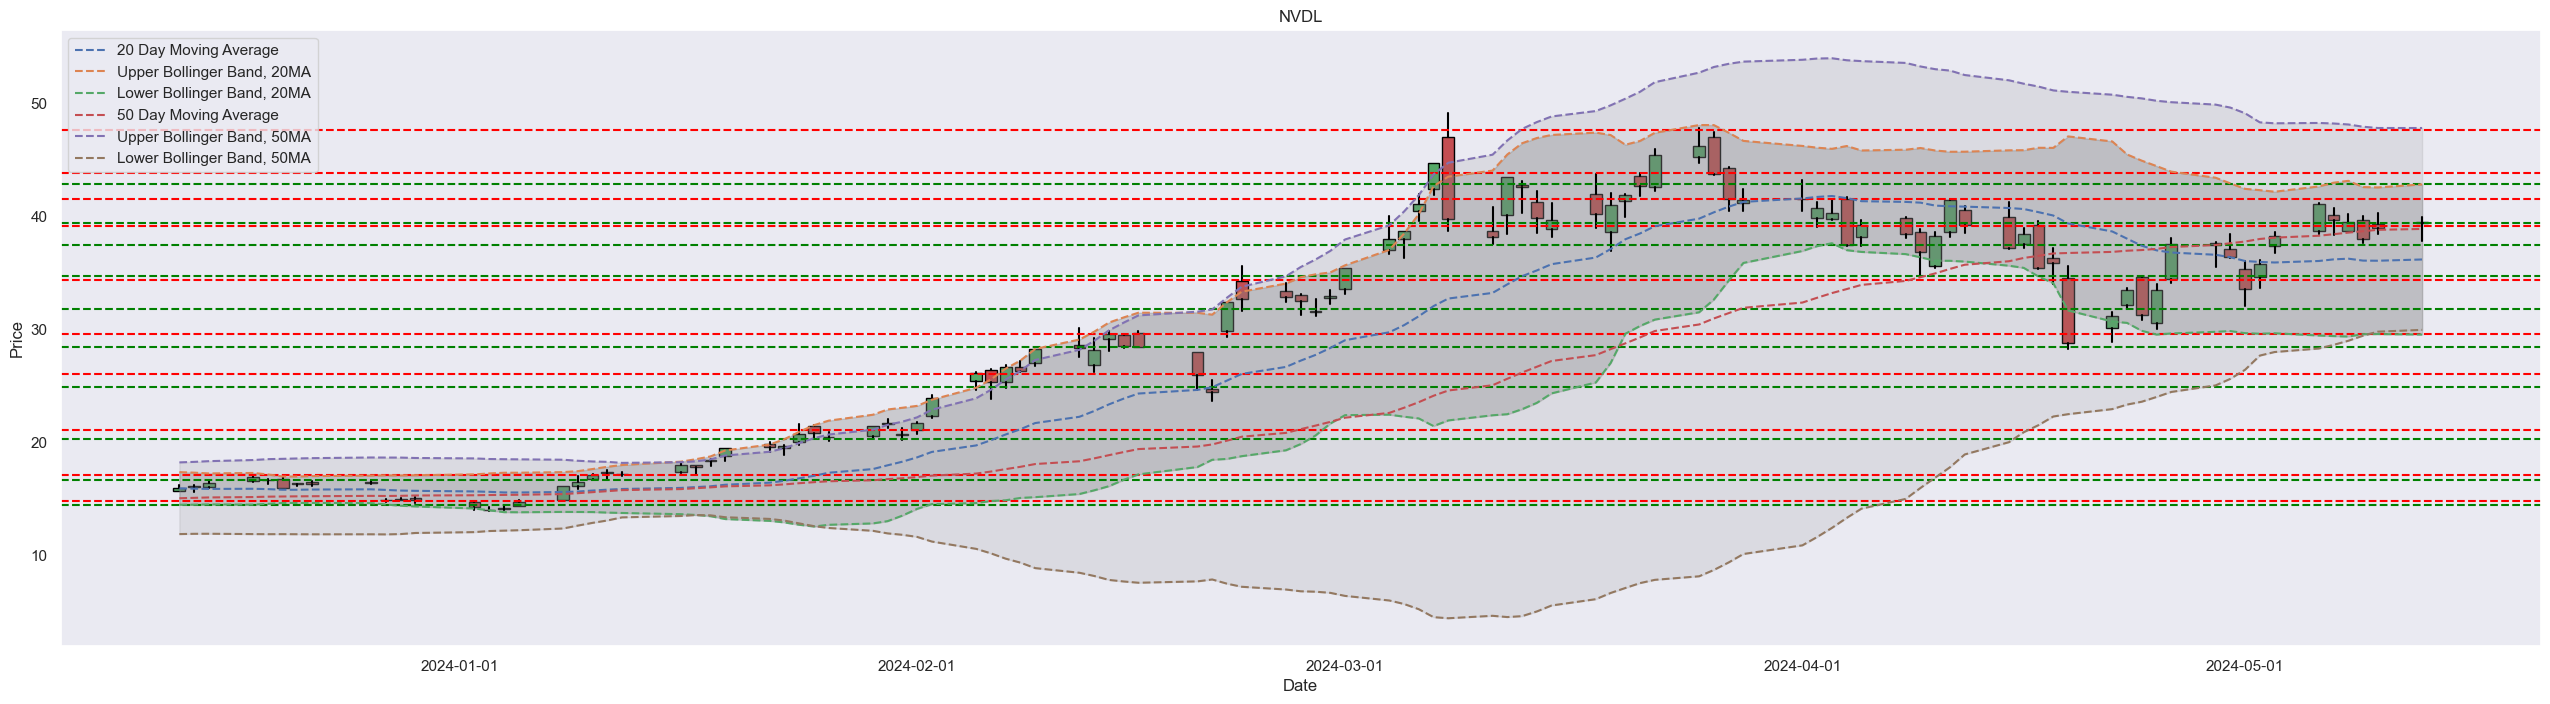

In [12]:
stock_strategy('nvdl', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('nvdl').latest_metric()
stock_strategy('nvdl').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 79.01 ~ up 79.88 , down 78.37
Latest 20 Day MA: 79.16
Latest Lower Bollinger Band, 20MA: 74.92
Latest Higher Bollinger Band, 20MA: 83.4
Latest 50 Day MA: 75.22
Latest Lower Bollinger Band, 50MA: 61.97
Latest Higher Bollinger Band, 50MA: 88.48

Latest RSI: 51.93 
Latest MACD Divergence: -0.25 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 79.16
20MA Lower Bollinger Band break point: 74.11
20MA Upper Bollinger Band break point: 84.22
50MA break point: 75.15
50MA Lower Bollinger Band break point: 60.72
50MA Upper Bollinger Band break point: 89.58
[[52.23416646]
 [56.60057155]
 [58.42275   ]
 [60.23810347]
 [61.57549973]
 [63.66111077]
 [68.54611121]
 [75.36444431]
 [78.37000005]
 [81.39799805]]
[[52.86636422]
 [57.39857123]
 [59.27081082]
 [61.12777758]
 [62.63571467]
 [64.58833249]
 [69.66555532]
 [77.01666684]
 [79.87714277]
 [83.7157135 ]]
[******

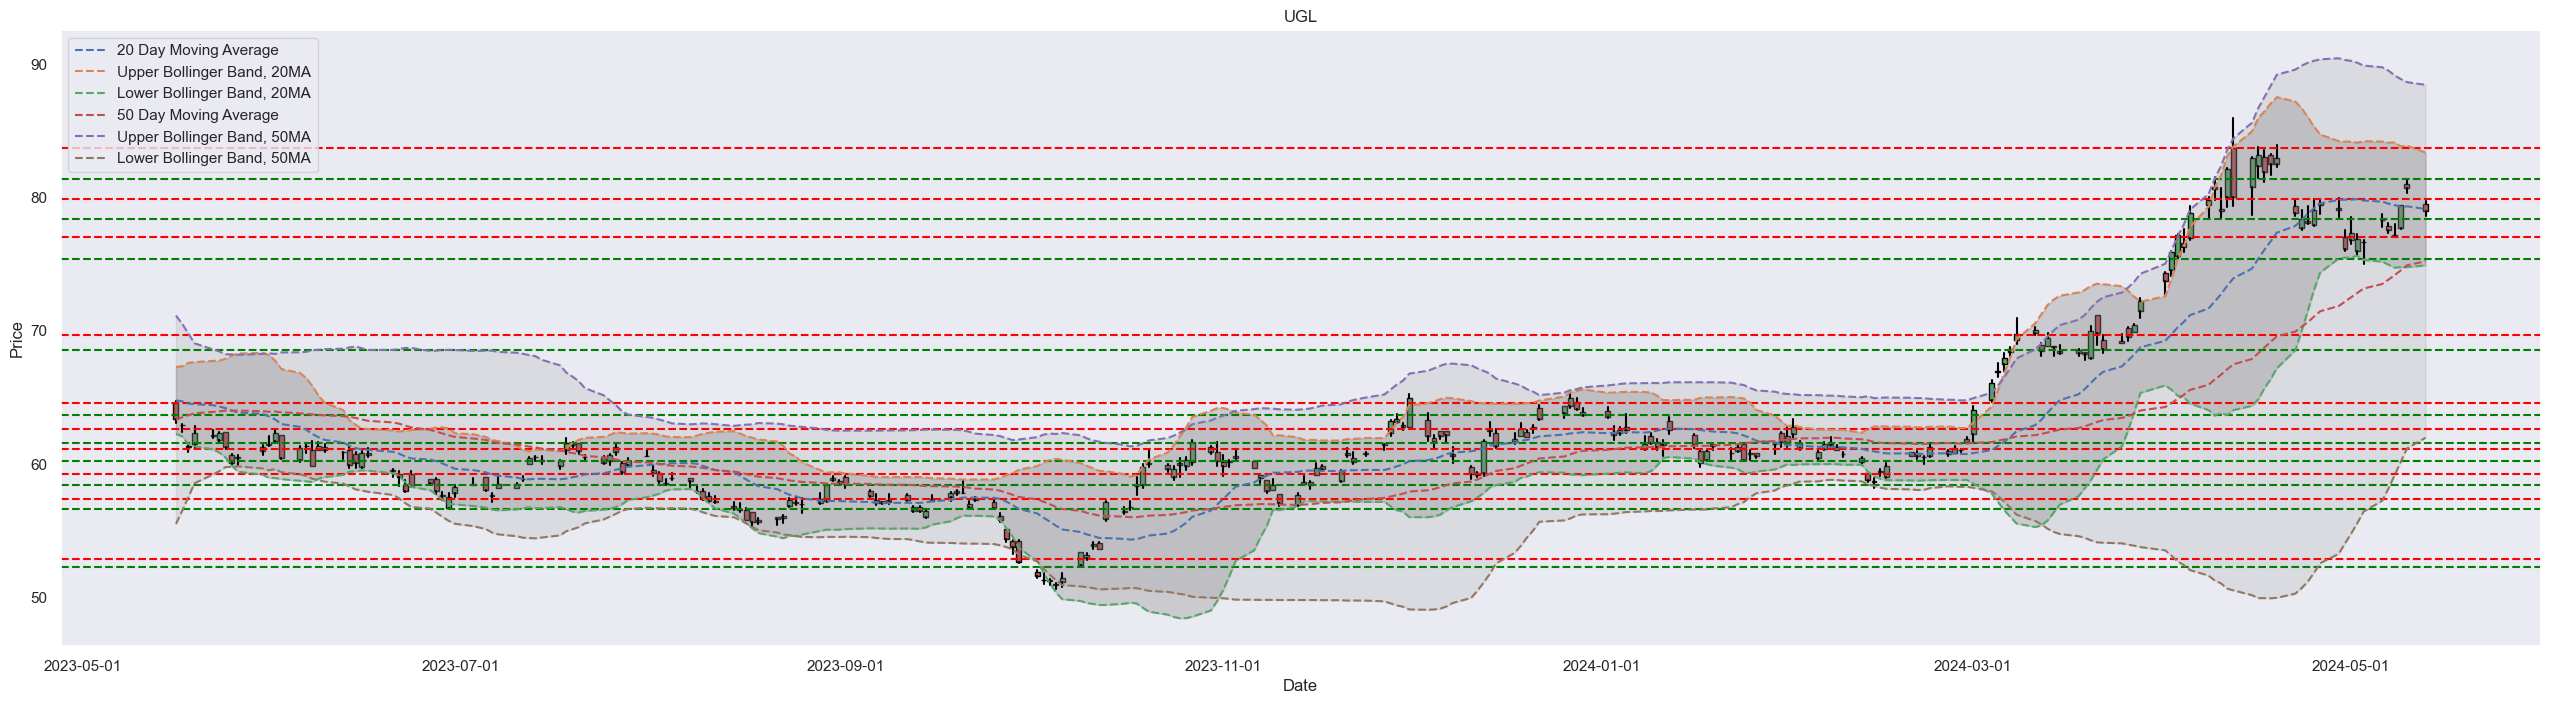

In [13]:
stock_strategy('ugl', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('ugl').latest_metric()
stock_strategy('ugl').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 44.17 ~ up 45.7 , down 41.65
Latest 20 Day MA: 45.98
Latest Lower Bollinger Band, 20MA: 41.66
Latest Higher Bollinger Band, 20MA: 50.31
Latest 50 Day MA: 45.45
Latest Lower Bollinger Band, 50MA: 34.77
Latest Higher Bollinger Band, 50MA: 56.12

Latest RSI: 35.73 
Latest MACD Divergence: -0.37 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 26.3
20MA break point: 46.08
20MA Lower Bollinger Band break point: 41.02
20MA Upper Bollinger Band break point: 51.14
50MA break point: 45.47
50MA Lower Bollinger Band break point: 33.81
50MA Upper Bollinger Band break point: 57.14
[[31.47503187]
 [34.81237897]
 [37.75493934]
 [41.65505877]
 [44.49358476]
 [47.73565794]
 [50.78089981]
 [54.44099998]
 [59.34850044]
 [64.95885849]]
[[33.01686279]
 [35.87289476]
 [38.48661904]
 [42.81038499]
 [45.69121808]
 [49.3916305 ]
 [52.87585153]
 [57.01444456]
 [62.7939998

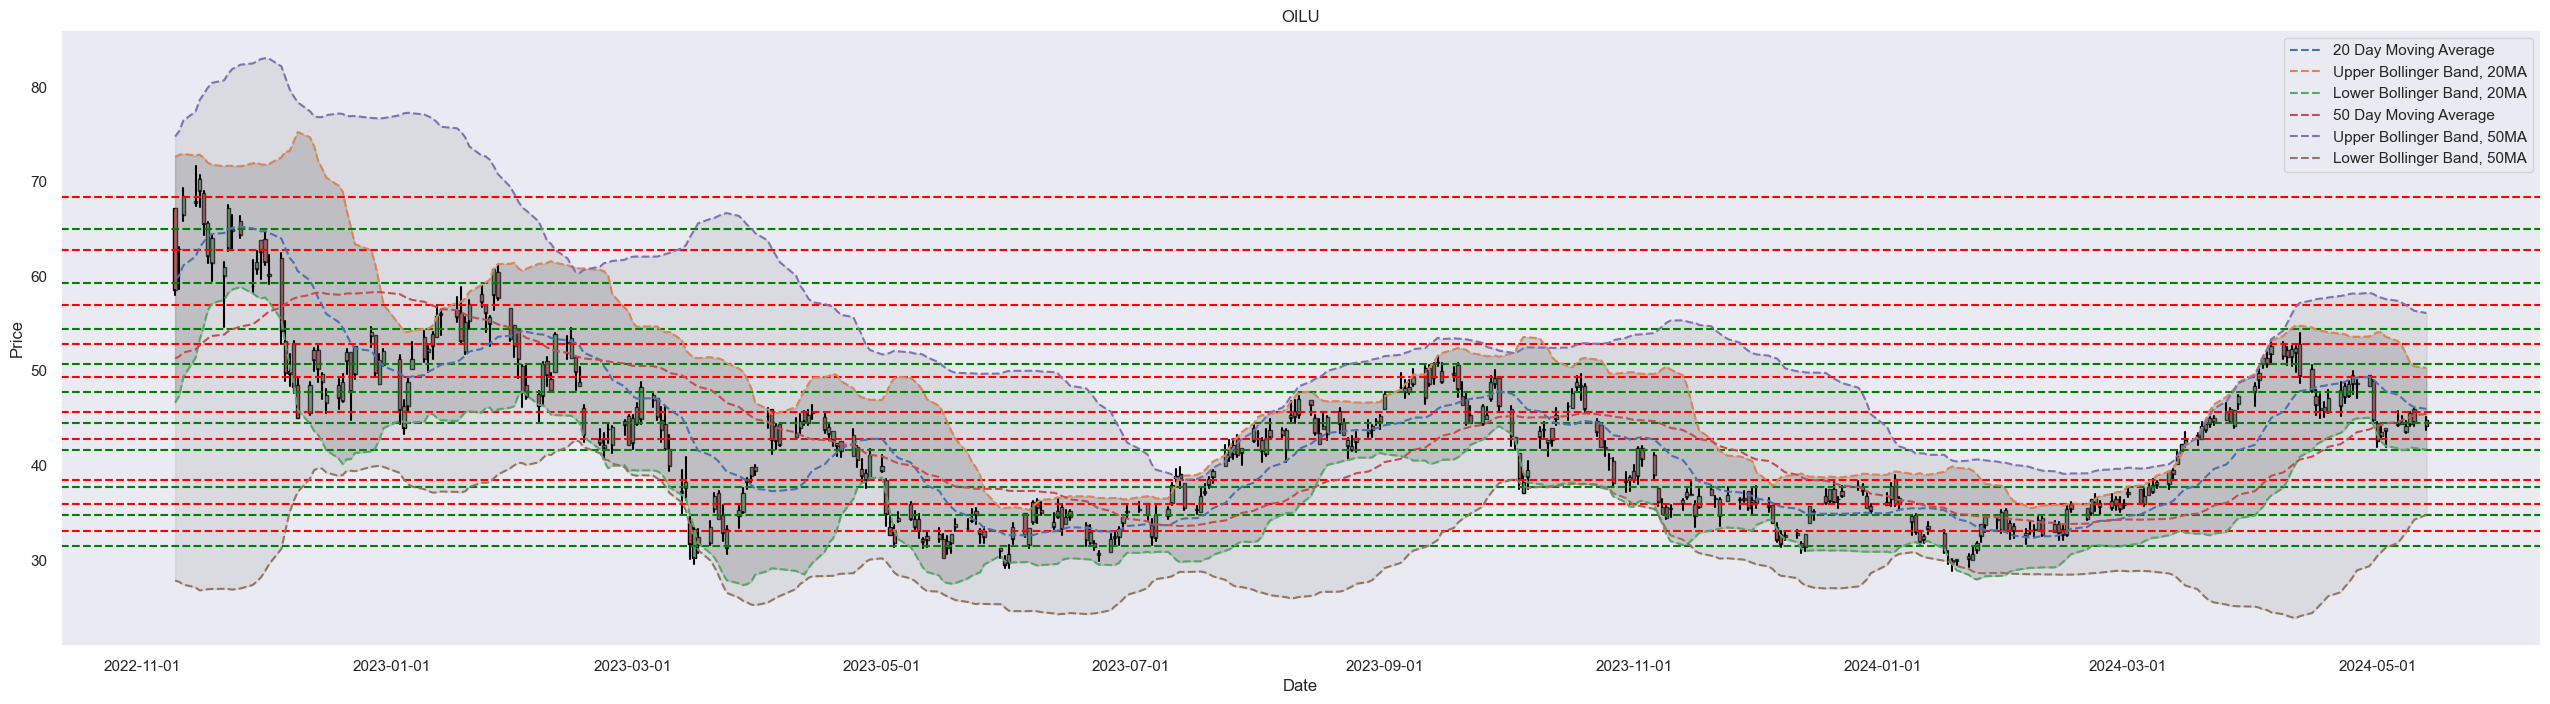

In [14]:
stock_strategy('oilu').output(strategy='daily')
stock_strategy('oilu').latest_metric()
stock_strategy('oilu').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 171.89 ~ up 186.13 , down 165.49
Latest 20 Day MA: 168.25
Latest Lower Bollinger Band, 20MA: 138.78
Latest Higher Bollinger Band, 20MA: 197.72
Latest 50 Day MA: 171.21
Latest Lower Bollinger Band, 50MA: 144.98
Latest Higher Bollinger Band, 50MA: 197.44

Latest RSI: 64.84 
Latest MACD Divergence: 0.15 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 270.62
20MA break point: 168.06
20MA Lower Bollinger Band break point: 132.96
20MA Upper Bollinger Band break point: 203.16
50MA break point: 171.2
50MA Lower Bollinger Band break point: 142.5
50MA Upper Bollinger Band break point: 199.89
[[116.1836837 ]
 [146.33722263]
 [165.49610047]
 [179.9544281 ]
 [193.53618136]
 [211.7532759 ]
 [231.41527318]
 [246.82780791]
 [267.56544152]
 [293.04888916]]
[[122.72529288]
 [147.71000017]
 [171.04355893]
 [186.12530286]
 [200.96000056]
 [222.20562894]
 [241.29692

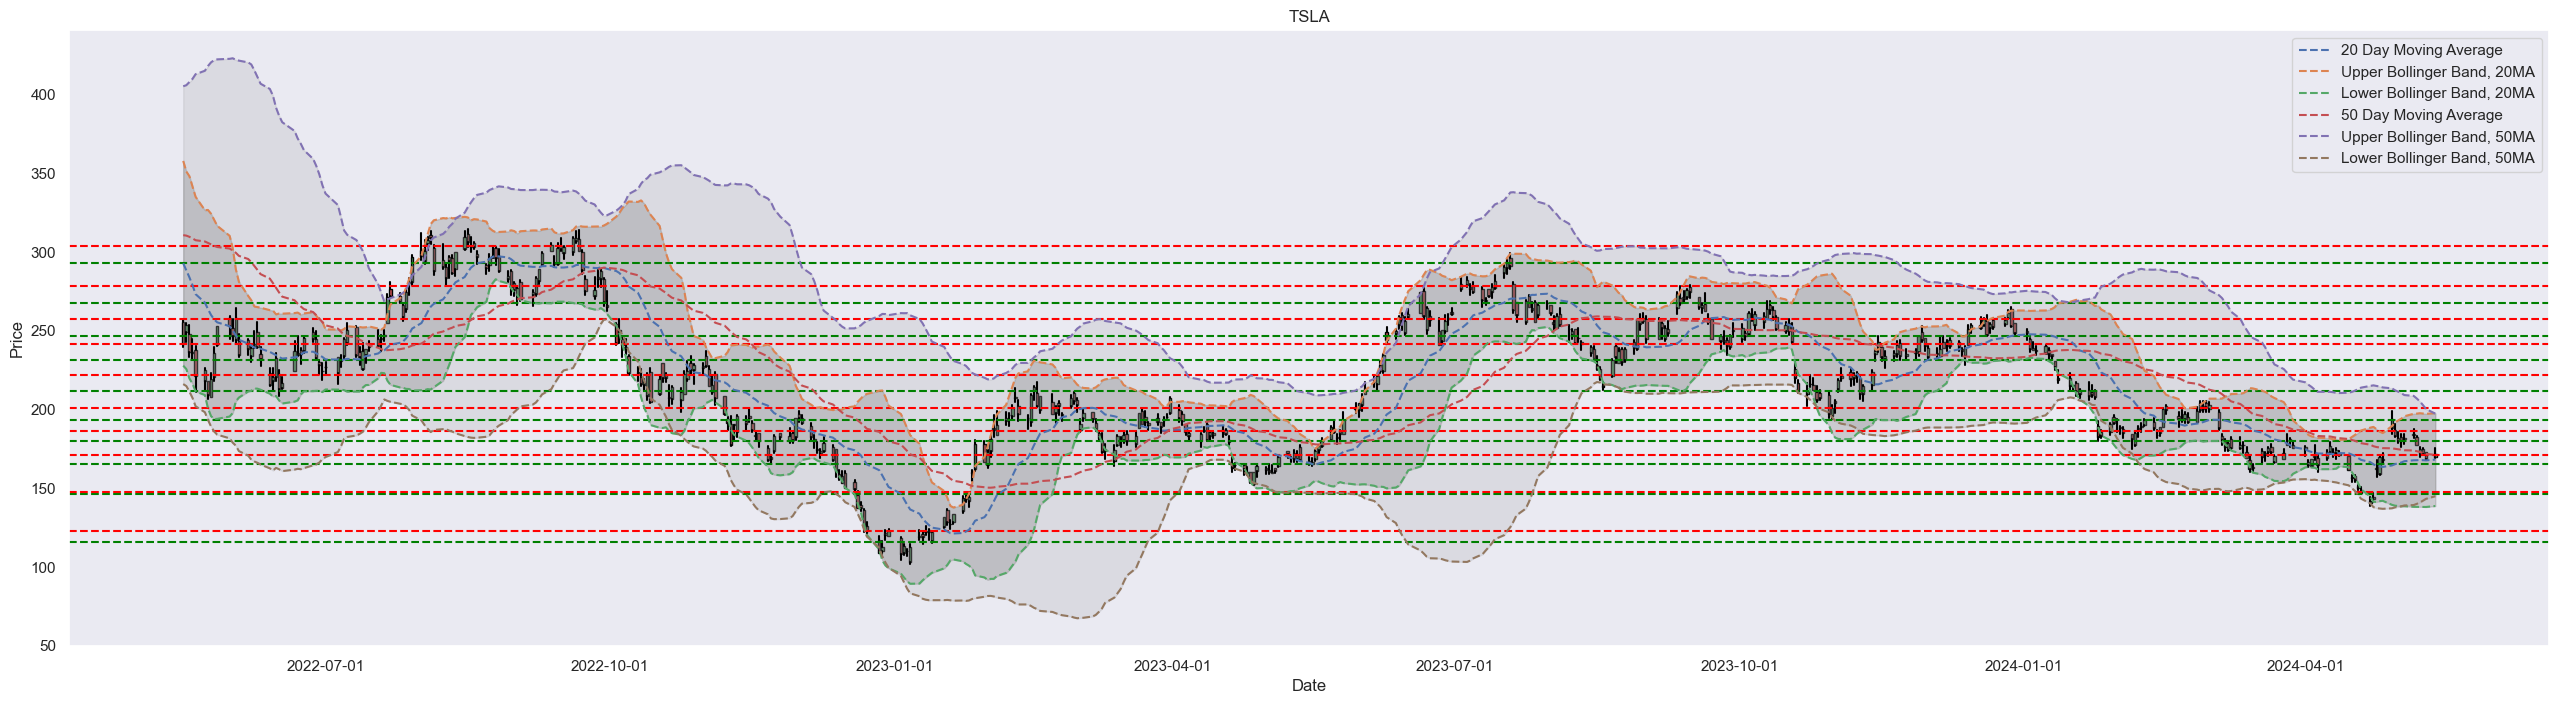

In [15]:
stock_strategy('tsla').output(strategy='daily')
stock_strategy('tsla').latest_metric()
stock_strategy('tsla').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 30.0 ~ up 33.79 , down 26.06
Latest 20 Day MA: 23.3
Latest Lower Bollinger Band, 20MA: 15.94
Latest Higher Bollinger Band, 20MA: 30.67
Latest 50 Day MA: 20.79
Latest Lower Bollinger Band, 50MA: 12.87
Latest Higher Bollinger Band, 50MA: 28.72

Latest RSI: 80.22 
Latest MACD Divergence: 0.57 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 22.95
20MA Lower Bollinger Band break point: 15.01
20MA Upper Bollinger Band break point: 30.89
50MA break point: 20.61
50MA Lower Bollinger Band break point: 12.73
50MA Upper Bollinger Band break point: 28.48
[[18.20399994]
 [26.06608105]
 [32.74294116]
 [38.76823532]
 [45.12032781]
 [54.00954524]
 [62.29363609]
 [69.27142879]
 [79.46947479]
 [92.95999951]]
[[18.84161632]
 [26.8723189 ]
 [33.7848487 ]
 [40.26303031]
 [46.45288453]
 [52.57518514]
 [62.96156275]
 [70.2878576 ]
 [82.99478315]
 [97.89052662]]
[********

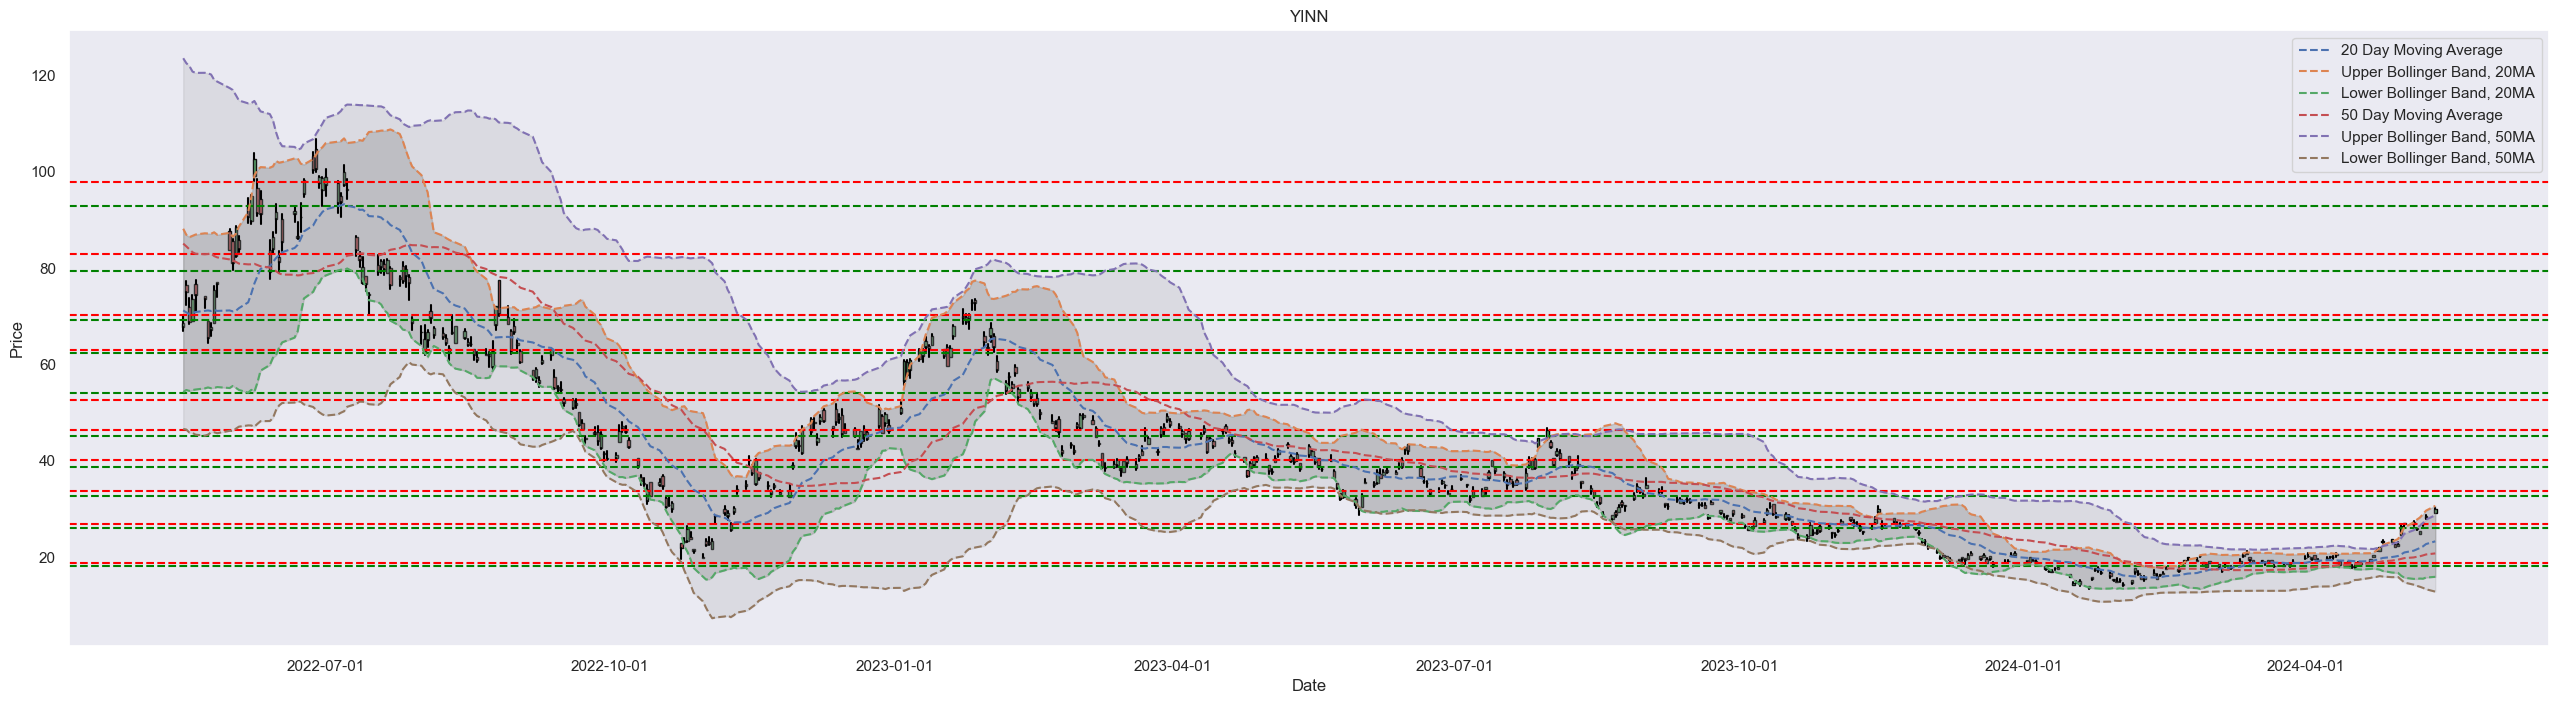

In [16]:
stock_strategy('yinn').output(strategy='daily')
stock_strategy('yinn').latest_metric()
stock_strategy('yinn').infer_metric()

Random stocks

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 55.26 ~ up 56.6 , down 54.55
Latest 20 Day MA: 54.77
Latest Lower Bollinger Band, 20MA: 50.62
Latest Higher Bollinger Band, 20MA: 58.91
Latest 50 Day MA: 57.68
Latest Lower Bollinger Band, 50MA: 49.38
Latest Higher Bollinger Band, 50MA: 65.99

Latest RSI: 42.86 
Latest MACD Divergence: 0.04 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 152.49
20MA break point: 54.74
20MA Lower Bollinger Band break point: 49.8
20MA Upper Bollinger Band break point: 59.68
50MA break point: 57.73
50MA Lower Bollinger Band break point: 48.7
50MA Upper Bollinger Band break point: 66.77
[[34.9034293 ]
 [37.44166629]
 [41.44250011]
 [44.76125002]
 [49.35499954]
 [52.13999987]
 [54.55029387]
 [57.25388845]
 [59.12875017]
 [61.79833285]]
[[35.18875027]
 [37.88038489]
 [41.01000086]
 [45.21222178]
 [50.68000031]
 [55.08409049]
 [56.59833315]
 [58.90730755]
 [61.62818215

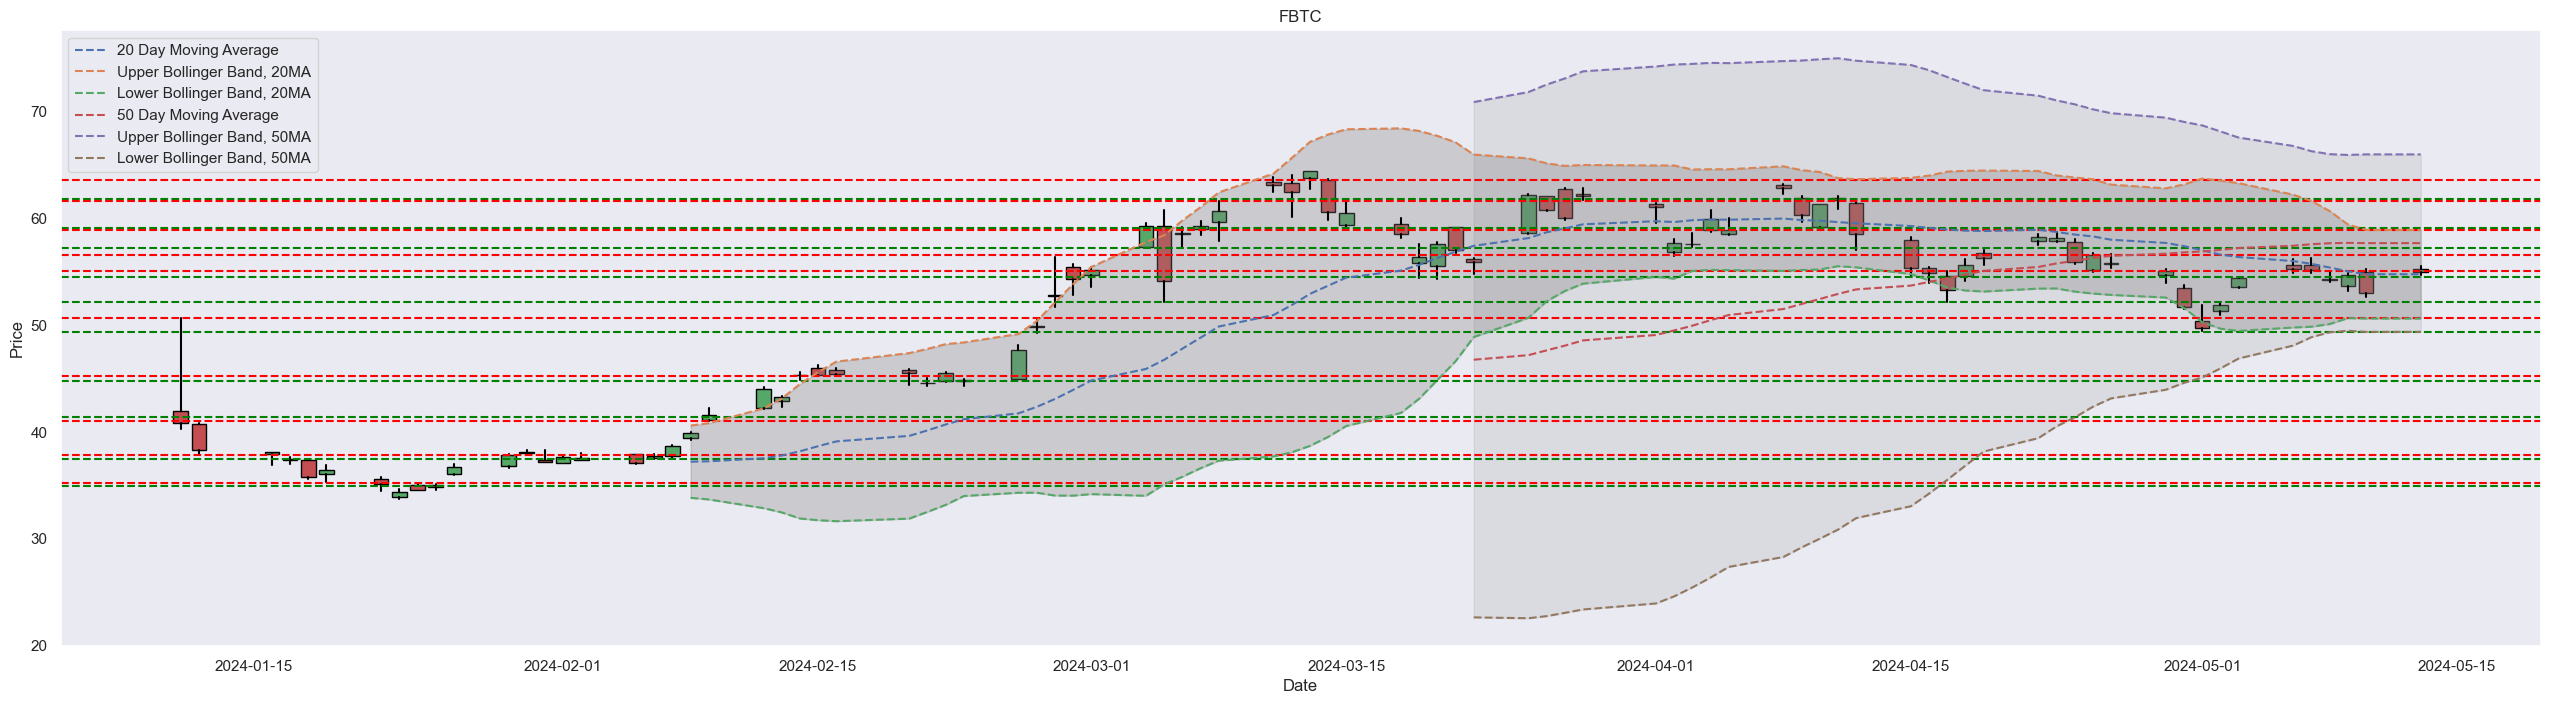

In [17]:
stock_strategy('fbtc').output(strategy='daily')
stock_strategy('fbtc').latest_metric()
stock_strategy('fbtc').infer_metric()
# stock_strategy('fbtc').latest_metric(realtime=False, imputed_value=67)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2024-05-14
* previous stock price closing 54.94 ~ up 55.97 , down 54.15
Latest 20 Day MA: 54.48
Latest Lower Bollinger Band, 20MA: 51.44
Latest Higher Bollinger Band, 20MA: 57.51
Latest 50 Day MA: 57.13
Latest Lower Bollinger Band, 50MA: 49.51
Latest Higher Bollinger Band, 50MA: 64.75

Latest RSI: 47.7 
Latest MACD Divergence: 0.11 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 152.49
20MA break point: 54.74
20MA Lower Bollinger Band break point: 49.8
20MA Upper Bollinger Band break point: 59.68
50MA break point: 57.73
50MA Lower Bollinger Band break point: 48.7
50MA Upper Bollinger Band break point: 66.77
[[14.66005381]
 [17.39250176]
 [20.07554009]
 [23.37373715]
 [25.84870325]
 [31.50952975]
 [37.23949435]
 [44.53749271]
 [54.15622386]
 [59.41777288]]
[[15.74194131]
 [18.68802351]
 [21.35396425]
 [24.408

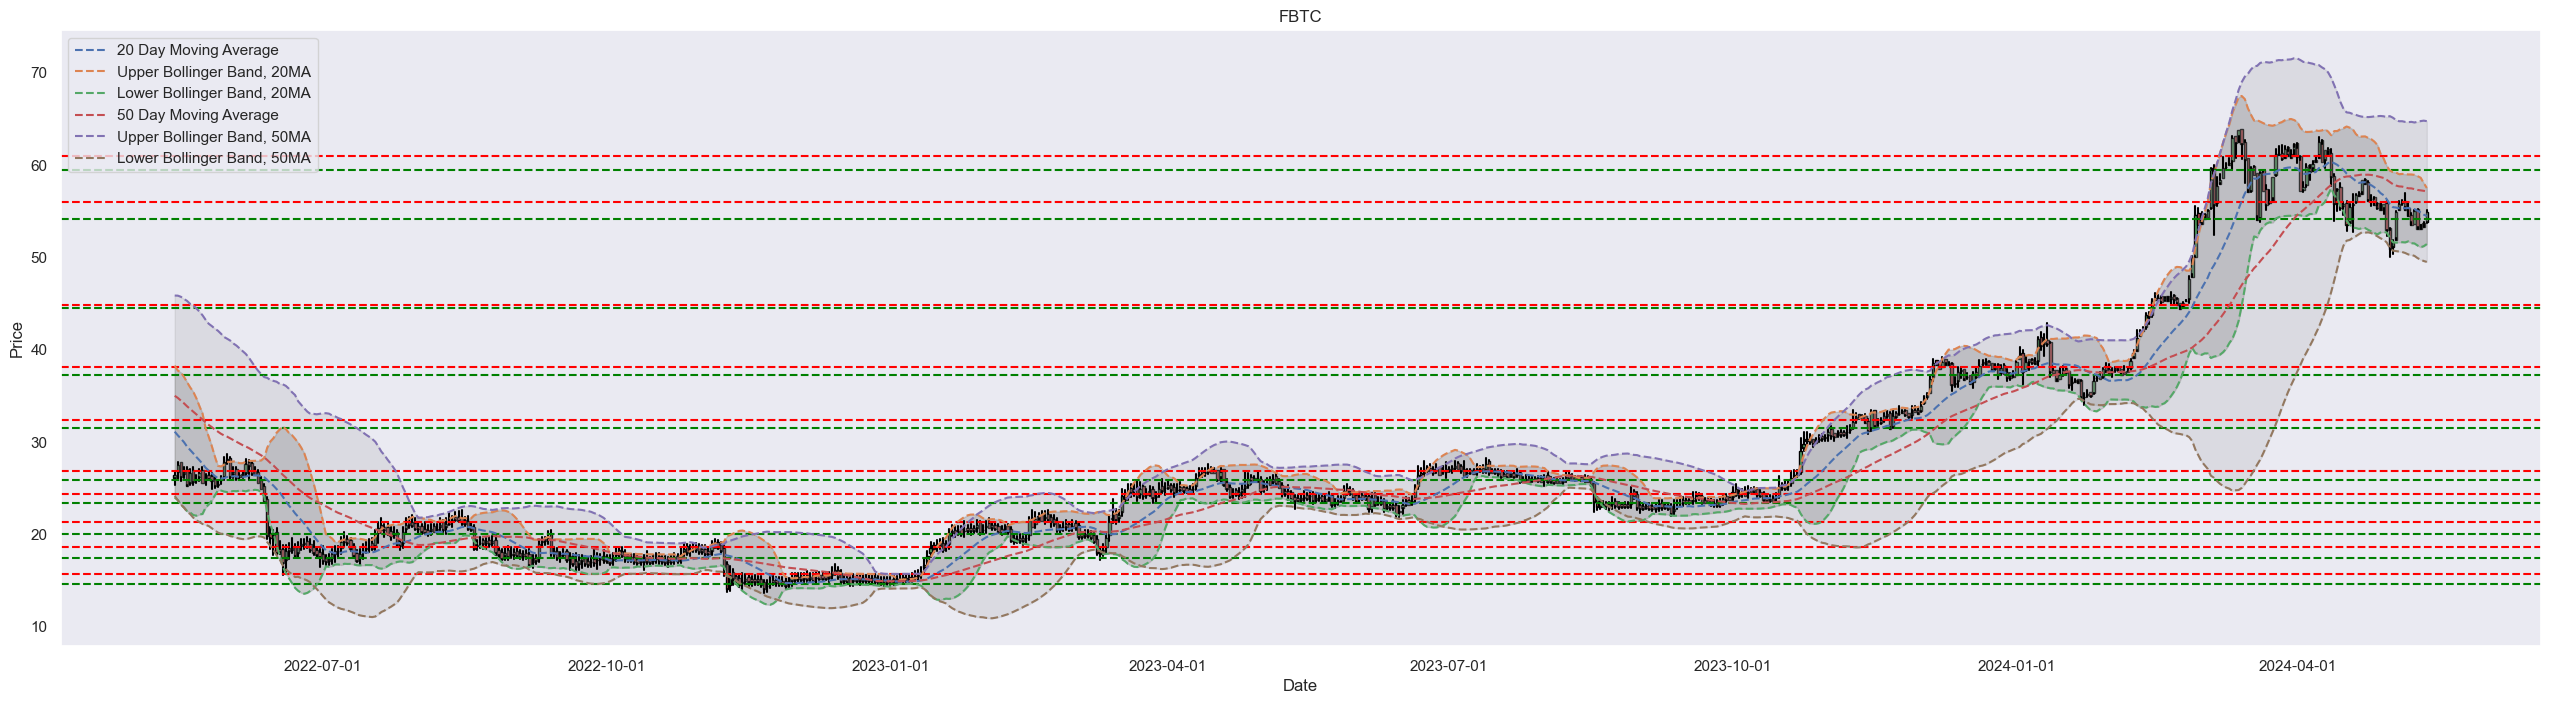

In [18]:
stock_strategy('fbtc', impute=True).output(strategy='daily')
stock_strategy('fbtc', impute=True).latest_metric()
stock_strategy('fbtc', impute=True).infer_metric()


[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 62901.45 ~ up 64370.3 , down 61225.37
Latest 20 Day MA: 62369.26
Latest Lower Bollinger Band, 20MA: 58867.26
Latest Higher Bollinger Band, 20MA: 65871.25
Latest 50 Day MA: 65427.02
Latest Lower Bollinger Band, 50MA: 56644.52
Latest Higher Bollinger Band, 50MA: 74209.52

Latest RSI: 47.7 
Latest MACD Divergence: 124.0 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 164826.87
20MA break point: 62341.25
20MA Lower Bollinger Band break point: 58173.72
20MA Upper Bollinger Band break point: 66508.77
50MA break point: 65478.56
50MA Lower Bollinger Band break point: 55921.57
50MA Upper Bollinger Band break point: 75035.55
[[16694.50156842]
 [19775.98742055]
 [22782.17394438]
 [26549.2568503 ]
 [29359.57416643]
 [35690.08701172]
 [42153.09883996]
 [50381.05533854]
 [61225.3790968 ]
 [67157.34040179]]
[[17041.41121419]
 [20474.29249278]
 [23627.39200368]

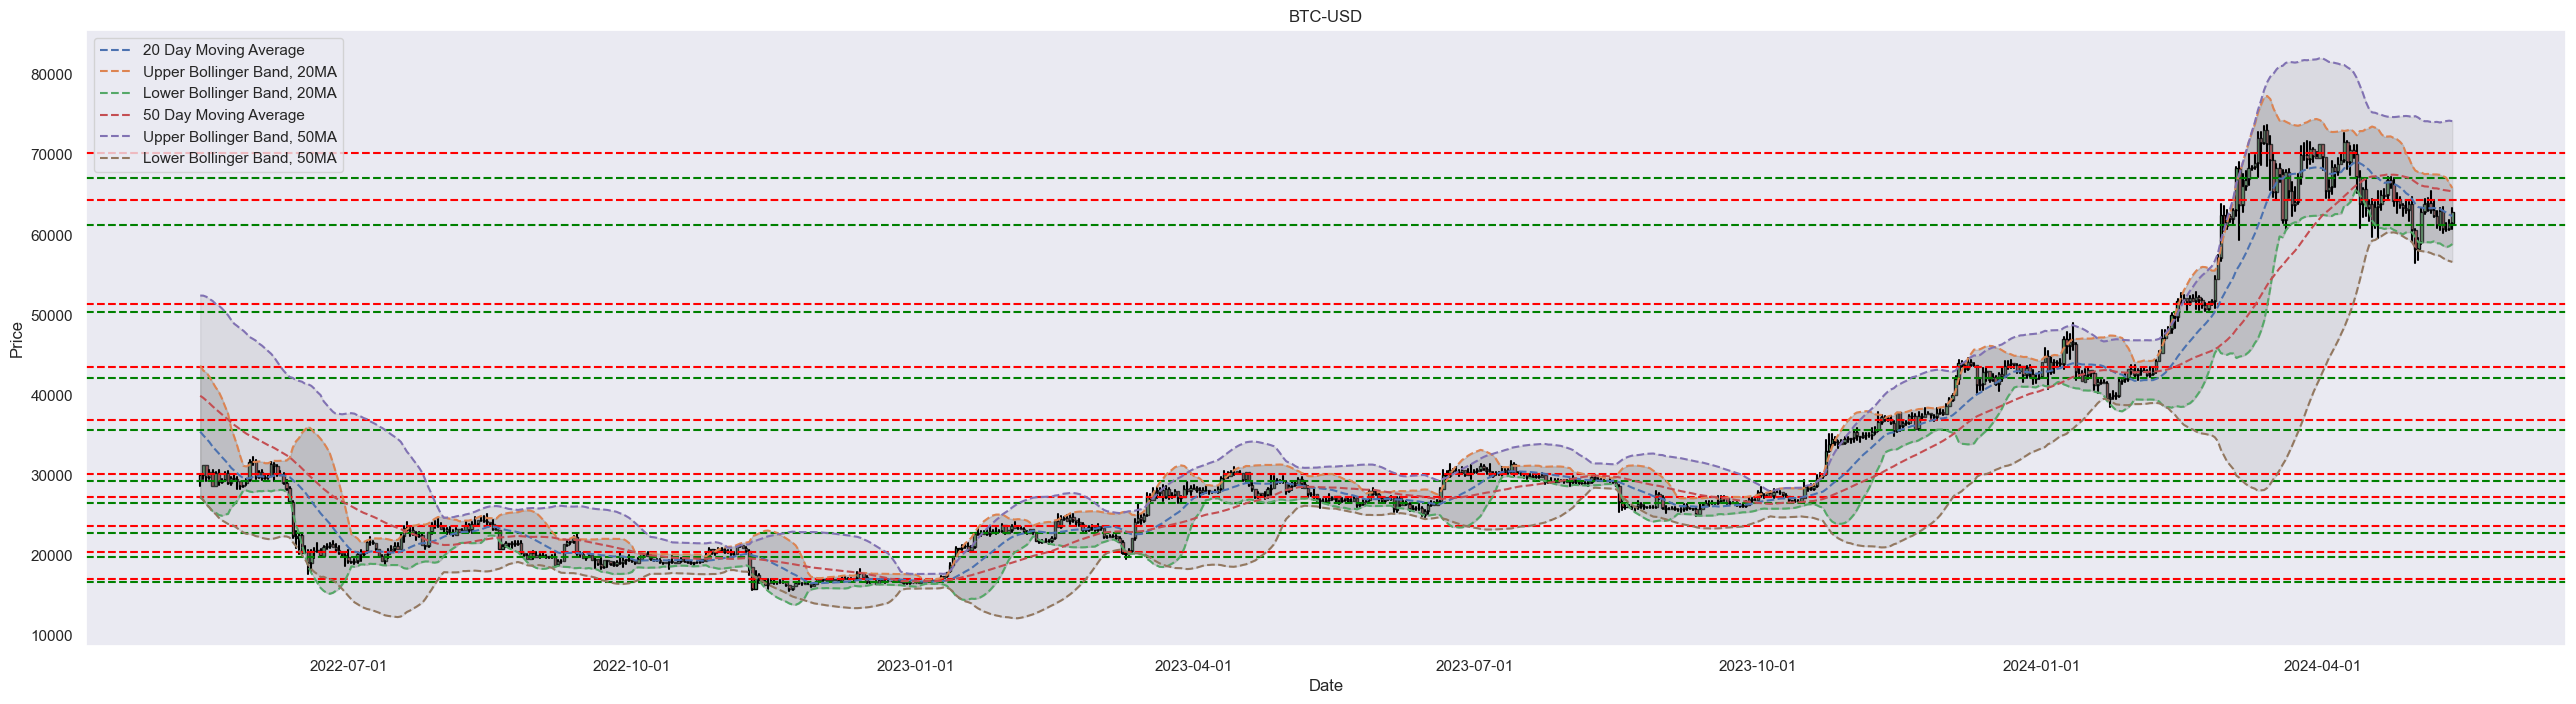

In [19]:
stock_strategy('btc-usd').output(strategy='daily')
stock_strategy('btc-usd').latest_metric()
stock_strategy('btc-usd').infer_metric()

### Backup only

In [20]:
# def get_optimum_clusters(df, saturation_point=0.05):
#     '''

#     :param df: dataframe
#     :param saturation_point: The amount of difference we are willing to detect
#     :return: clusters with optimum K centers

#     This method uses elbow method to find the optimum number of K clusters
#     We initialize different K-means with 1..10 centers and compare the inertias
#     If the difference is no more than saturation_point, we choose that as K and move on
#     '''

#     wcss = []
#     k_models = []

#     size = min(11, len(df.index))
#     for i in range(1, size):
#         kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#         kmeans.fit(df)
#         wcss.append(kmeans.inertia_)
#         k_models.append(kmeans)

#     # Compare differences in inertias until it's no more than saturation_point
#     optimum_k = len(wcss)-1
#     for i in range(0, len(wcss)-1):
#         diff = abs(wcss[i+1] - wcss[i])
#         if diff < saturation_point:
#             optimum_k = i
#             break

#     # knee = KneeLocator(range(1, size), wcss, curve='convex', direction='decreasing')
#     # optimum_k = knee.knee

#     # print("Optimum K is " + str(optimum_k + 1))
#     optimum_clusters = k_models[optimum_k]

#     return optimum_clusters

In [21]:
# def break_point_solution(stock_name):
#     '''
#     Solve for the break point solution price for breaking the current MA/BB
#     stock_name: str
#     '''
#     df = yf.download(stock_name.upper(),
#                  start=(datetime.today() - relativedelta(days=100)).strftime('%Y-%m-%d'),
#                  end=datetime.today()
#                  )
#     df = df.reset_index()
#     df.columns = df.columns.str.lower()
#     # df = df[['close']]
    
#     # Define the expression whose roots we want to find
#     # fsolve is not satisfying; provide analytical solution
    
#     # last_19day_price = df['close'][-20:-1]
#     # last_49day_price = df['close'][-50:-1]
#     last_19day_price = df[df['date'].between(
#         (datetime.today()-relativedelta(days=19)).strftime('%Y-%m-%d'),
#         (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d'))]['close']
#     last_49day_price = df[df['date'].between(
#         (datetime.today()-relativedelta(days=49)).strftime('%Y-%m-%d'),
#         (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d'))]['close']
    
#     # func_20MA = lambda price : (np.sum(last_19day_price) + price)/20 - price
#     # func_50MA = lambda price : (np.sum(last_49day_price) + price)/50 - price
#     # func_20MA_UBB = lambda price : (np.sum(last_19day_price) + price)/20 + 2*np.sqrt((np.sum(last_19day_price**2) + price**2 - (np.sum(last_19day_price) + price)**2/20)/19) - price
#     # func_20MA_LBB = lambda price : (np.sum(last_19day_price) + price)/20 - 2*np.sqrt((np.sum(last_19day_price**2) + price**2 - (np.sum(last_19day_price) + price)**2/20)/19) - price
#     # func_50MA_UBB = lambda price : (np.sum(last_49day_price) + price)/50 + 2.5*np.sqrt((np.sum(last_49day_price**2) + price**2 - (np.sum(last_49day_price) + price)**2/50)/49) - price
#     # func_50MA_LBB = lambda price : (np.sum(last_49day_price) + price)/50 - 2.5*np.sqrt((np.sum(last_49day_price**2) + price**2 - (np.sum(last_49day_price) + price)**2/50)/49) - price

#     # func_20MA = lambda price : np.mean(np.append(last_19day_price, price)) - price
#     # func_50MA = lambda price : np.mean(np.append(last_49day_price, price)) - price
#     # func_20MA_UBB = lambda price : np.mean(np.append(last_19day_price, price)) + 2 * np.std(np.append(last_19day_price, price), ddof=1) - price
#     # func_20MA_LBB = lambda price : np.mean(np.append(last_19day_price, price)) - 2 * np.std(np.append(last_19day_price, price), ddof=1) - price
#     # func_50MA_UBB = lambda price : np.mean(np.append(last_49day_price, price)) + 2.5 * np.std(np.append(last_49day_price, price), ddof=1) - price
#     # func_50MA_LBB = lambda price : np.mean(np.append(last_49day_price, price)) - 2.5 * np.std(np.append(last_49day_price, price), ddof=1) - price

#     # price_initial_guess = df['close'].tolist()[-1]
#     # price_solution = fsolve(func_20MA, price_initial_guess)
#     # price_solution = fsolve(func_50MA, price_initial_guess)
#     # price_solution = fsolve(func_20MA_UBB, price_initial_guess)
#     # price_solution = fsolve(func_20MA_LBB, price_initial_guess)
#     # price_solution = fsolve(func_50MA_UBB, price_initial_guess)
#     # price_solution = fsolve(func_50MA_LBB, price_initial_guess)

#     a1 = np.sum(last_19day_price)
#     a2 = np.sum(last_19day_price**2)
#     p_ma = np.mean(last_19day_price)
#     p_ubb = (562*a1 + np.sqrt((562*a1)**2 - 4*(5339*(99*a1**2-1600*a2))))/5339/2
#     p_lbb = (562*a1 - np.sqrt((562*a1)**2 - 4*(5339*(99*a1**2-1600*a2))))/5339/2
    
#     print('20MA break point:', round(p_ma,2))
#     print('20MA Lower Bollinger Band break point:', round(p_lbb,2))
#     print('20MA Upper Bollinger Band break point:', round(p_ubb,2))

#     a1 = np.sum(last_49day_price)
#     a2 = np.sum(last_49day_price**2)
#     p_ma = np.mean(last_49day_price)
#     p_ubb = (4177*a1 + np.sqrt((4177*a1)**2 - 4*(102336.5*(361.5*a1**2-15625*a2))))/102336.5/2
#     p_lbb = (4177*a1 - np.sqrt((4177*a1)**2 - 4*(102336.5*(361.5*a1**2-15625*a2))))/102336.5/2
    
#     print('50MA break point:', round(p_ma,2))
#     print('50MA Lower Bollinger Band break point:', round(p_lbb,2))
#     print('50MA Upper Bollinger Band break point:', round(p_ubb,2))

In [22]:
# from dateutil.relativedelta import relativedelta

# def test_option_trading(stock_name,
#                         start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d'),
#                         end=datetime.today().strftime('%Y-%m-%d'),
#                         return_result=False,
#                        ):

#     # Step 0: download the stock
#     df = yf.download(stock_name.upper(), start=start, end=end)
#     df = df.reset_index()
#     df.columns = df.columns.str.lower()

#     print(datetime.today().strftime('%Y-%m-%d'))

#     # Step 1: Moving average and Bollinger Band
    
#     df['20 Day MA'] = df['close'].rolling(window=20).mean()
#     df['20 Day STD'] = df['close'].rolling(window=20).std()
#     df['Upper Band - 20MA'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
#     df['Lower Band - 20MA'] = df['20 Day MA'] - (df['20 Day STD'] * 2)
#     df['50 Day MA'] = df['close'].rolling(window=50).mean()
#     df['50 Day STD'] = df['close'].rolling(window=50).std()
#     df['Upper Band - 50MA'] = df['50 Day MA'] + (df['50 Day STD'] * 2.5)
#     df['Lower Band - 50MA'] = df['50 Day MA'] - (df['50 Day STD'] * 2.5)
    
#     # Step 2: calculate RSI
#     # RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ] over a window
#     # default length of the window is most recent 14 trade days

#     delta = df['close'].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
#     rs = gain / loss
#     df['RSI'] = 100 - (100 / (1 + rs))

#     # Step 3: Calculate MACD
#     df['12 Day EMA'] = df['close'].ewm(span=12, adjust=False).mean()
#     df['26 Day EMA'] = df['close'].ewm(span=26, adjust=False).mean()
#     # Calculate MACD line
#     df['MACD'] = df['12 Day EMA'] - df['26 Day EMA']
#     # Calculate signal line (9-period EMA of MACD line)
#     df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

#     # Step 4: Support and resistance calculation, using clustering
    
#     df_plot = df[df['date'] >= df['date'].min() + relativedelta(years=1)]

#     low_clusters = get_optimum_clusters(df_plot[(df_plot['low']!=df_plot['open'])&(df_plot['low']!=df_plot['close'])][['date',"low"]].set_index('date'))
#     # low_clusters = get_optimum_clusters(df_plot[['date',"low"]].set_index('date'))
#     low_centers = low_clusters.cluster_centers_
#     low_centers = np.sort(low_centers, axis=0)

#     high_clusters = get_optimum_clusters(df_plot[(df_plot['high']!=df_plot['open'])&(df_plot['high']!=df_plot['close'])][['date',"high"]].set_index('date'))
#     # high_clusters = get_optimum_clusters(df_plot[['date',"high"]].set_index('date'))
#     high_centers = high_clusters.cluster_centers_
#     high_centers = np.sort(high_centers, axis=0)

#     yesterday = (datetime.today() - relativedelta(days=1)).strftime('%Y-%m-%d')
#     close = df_plot[df_plot['date']==yesterday]['close'].item()
#     try: 
#         support = max([e[0] for e in low_centers if e < close])
#     except:
#         print('Break all support; record min stock price')
#         support = df_plot['low'].min()
#     try:
#         resistance = min([e[0] for e in high_centers if e > close])
#     except:
#         print('Break all resistance; record max stock price')
#         resistance = df_plot['high'].max()

#     # Finally, output and plot 
    
#     print('* previous stock price closing', round(close,2), '~ up', ceil(resistance*100)/100.0, ', down', floor(support*100)/100)
#     print("Latest 20 Day MA:", round(df_plot[df_plot['date']==yesterday]['20 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 20MA'].item(), 2))
#     print("Latest higher Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 20MA'].item(), 2))
#     print("Latest 50 Day MA:", round(df_plot[df_plot['date']==yesterday]['50 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 50MA'].item(), 2))
#     print("Latest higher Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 50MA'].item(), 2))
#     print()

#     latest_rsi = round(df_plot[df_plot['date']==yesterday]['RSI'].item(), 2)
#     if latest_rsi > 70:
#         print("Latest RSI:", Fore.RED + str(latest_rsi), Style.RESET_ALL)
#     elif latest_rsi < 30:
#         print("Latest RSI:", Fore.GREEN + str(latest_rsi), Style.RESET_ALL)
#     else:
#         print("Latest RSI:", latest_rsi, Style.RESET_ALL)
#     latest_macd = round(df[df['date']==yesterday]['MACD'].item() - df[df['date']==yesterday]['MACD_signal'].item(), 2)
#     if latest_macd < 0:
#         print("Latest MACD Divergence:", Fore.RED + str(latest_macd), Style.RESET_ALL)
#     elif latest_macd > 0:
#         print("Latest MACD Divergence:", Fore.GREEN + str(latest_macd), Style.RESET_ALL)
#     else:
#         print("Latest MACD Divergence:", Fore.BLACK + str(latest_macd), Style.RESET_ALL)
#     break_point_solution(stock_name)
    
#     print(low_centers)
#     print(high_centers)
    
#     ax = plot_candlestick(df_plot, figsize=(32,8))
#     ax.set_title(stock_name)
#     for low in low_centers[:]:
#         ax.axhline(low[0], color='green', ls='--')

#     for high in high_centers[:]:
#         ax.axhline(high[0], color='red', ls='--')
#     # df_plot['5_MA'] = df_plot['close'].rolling(window=5).mean()
#     # df_plot['9_MA'] = df_plot['close'].rolling(window=9).mean()
#     # df_plot['20_MA'] = df_plot['close'].rolling(window=20).mean()
#     # df_plot['50_MA'] = df_plot['close'].rolling(window=50).mean()

#     # ax.plot(df_plot['date'], df_plot['close'], color='black')
#     # ax.plot(df_plot['date'], df_plot['5_MA'], ls='--')

#     # ax.plot(df_plot['date'], df_plot['9_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['20_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['50_MA'], ls='--')
#     ax.plot(df_plot['date'], df_plot['20 Day MA'], ls='--', label='20 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 20MA'], ls='--', label='Upper Bollinger Band, 20MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 20MA'], ls='--', label='Lower Bollinger Band, 20MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 20MA'], df_plot['Lower Band - 20MA'], color='gray', alpha=0.3) # Fill the area between the bands
#     ax.plot(df_plot['date'], df_plot['50 Day MA'], ls='--', label='50 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 50MA'], ls='--', label='Upper Bollinger Band, 50MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 50MA'], ls='--', label='Lower Bollinger Band, 50MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 50MA'], df_plot['Lower Band - 50MA'], color='gray', alpha=0.15) # Fill the area between the bands

#     ax.legend()

#     if return_result:
#         return df_plot

In [23]:
# test_option_trading('qqq')

In [24]:
# def test_option_trading_fbtc(
#                         start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d'),
#                         end=datetime.today().strftime('%Y-%m-%d')
#                        ):
#     df = yf.download('BTC-USD', start=start, end=end)
#     df = df.reset_index()
#     df.columns = df.columns.str.lower()

#     df_fbtc = yf.download('fbtc', start=start, end=end)
#     df_fbtc = df_fbtc.reset_index()
#     df_fbtc.columns = df_fbtc.columns.str.lower()

#     print(datetime.today().strftime('%Y-%m-%d'))

#     df_merged = pd.merge(df[['date','open','high', 'low','close']],
#                   df_fbtc[['date','open','high', 'low','close']],
#                   on='date')
#     s1 = df_merged['close_x']
#     s2 = df_merged['close_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['close'] = theta_best[0] + theta_best[1]*df['close']

#     s1 = df_merged['open_x']
#     s2 = df_merged['open_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['open'] = theta_best[0] + theta_best[1]*df['open']

#     s1 = df_merged['low_x']
#     s2 = df_merged['low_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['low'] = theta_best[0] + theta_best[1]*df['low']

#     s1 = df_merged['high_x']
#     s2 = df_merged['high_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['high'] = theta_best[0] + theta_best[1]*df['high']

#     df['20 Day MA'] = df['close'].rolling(window=20).mean()
#     df['20 Day STD'] = df['close'].rolling(window=20).std()
#     df['50 Day MA'] = df['close'].rolling(window=50).mean()
#     df['50 Day STD'] = df['close'].rolling(window=50).std()    
#     # Calculate upper and Lower bands
#     df['Upper Band - 20MA'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
#     df['Lower Band - 20MA'] = df['20 Day MA'] - (df['20 Day STD'] * 2)
#     df['Upper Band - 50MA'] = df['50 Day MA'] + (df['50 Day STD'] * 2.5)
#     df['Lower Band - 50MA'] = df['50 Day MA'] - (df['50 Day STD'] * 2.5)

#     # Calculate RSI
#     delta = df['close'].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
#     rs = gain / loss
#     df['RSI'] = 100 - (100 / (1 + rs))

#     # Calculate MACD
#     df['12 Day EMA'] = df['close'].ewm(span=12, adjust=False).mean()
#     df['26 Day EMA'] = df['close'].ewm(span=26, adjust=False).mean()
#     # Calculate MACD line
#     df['MACD'] = df['12 Day EMA'] - df['26 Day EMA']
#     # Calculate signal line (9-period EMA of MACD line)
#     df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

#     df_plot = df[df['date'] >= df['date'].min() + relativedelta(years=1)]

#     low_clusters = get_optimum_clusters(df_plot[(df_plot['low']!=df_plot['open'])&(df_plot['low']!=df_plot['close'])][['date',"low"]].set_index('date'))
#     # low_clusters = get_optimum_clusters(df_plot[['date',"low"]].set_index('date'))
#     low_centers = low_clusters.cluster_centers_
#     low_centers = np.sort(low_centers, axis=0)

#     high_clusters = get_optimum_clusters(df_plot[(df_plot['high']!=df_plot['open'])&(df_plot['high']!=df_plot['close'])][['date',"high"]].set_index('date'))
#     # high_clusters = get_optimum_clusters(df_plot[['date',"high"]].set_index('date'))
#     high_centers = high_clusters.cluster_centers_
#     high_centers = np.sort(high_centers, axis=0)

#     yesterday = (datetime.today() - relativedelta(days=1)).strftime('%Y-%m-%d')
#     close = df_plot[df_plot['date']==yesterday]['close'].item()
#     try: 
#         support = max([e[0] for e in low_centers if e < close])
#     except:
#         print('Break all support; record min stock price')
#         support = df_plot['low'].min()
#     try:
#         resistance = min([e[0] for e in high_centers if e > close])
#     except:
#         print('Break all resistance; record max stock price')
#         resistance = df_plot['high'].max()

#     print('* previous stock price closing', round(close,2), '~ up', ceil(resistance*100)/100.0, ', down', floor(support*100)/100)
#     print("Latest 20 Day MA:", round(df_plot[df_plot['date']==yesterday]['20 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 20MA'].item(), 2))
#     print("Latest higher Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 20MA'].item(), 2))
#     print("Latest 50 Day MA:", round(df_plot[df_plot['date']==yesterday]['50 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 50MA'].item(), 2))
#     print("Latest higher Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 50MA'].item(), 2))
#     print()
    
#     latest_rsi = round(df_plot[df_plot['date']==yesterday]['RSI'].item(), 2)
#     if latest_rsi > 70:
#         print("Latest RSI:", Fore.RED + str(latest_rsi), Style.RESET_ALL)
#     elif latest_rsi < 30:
#         print("Latest RSI:", Fore.GREEN + str(latest_rsi), Style.RESET_ALL)
#     else:
#         print("Latest RSI:", latest_rsi, Style.RESET_ALL)
#     latest_macd = round(df_plot[df_plot['date']==yesterday]['MACD'].item() - df_plot[df_plot['date']==yesterday]['MACD_signal'].item(), 2)
#     if latest_macd < 0:
#         print("Latest MACD Divergence:", Fore.RED + str(latest_macd), Style.RESET_ALL)
#     elif latest_macd > 0:
#         print("Latest MACD Divergence:", Fore.GREEN + str(latest_macd), Style.RESET_ALL)
#     else:
#         print("Latest MACD Divergence:", Fore.BLACK + str(latest_macd), Style.RESET_ALL)
    
#     break_point_solution("fbtc")
    
#     print(low_centers)
#     print(high_centers)

#     ax = plot_candlestick(df_plot, figsize=(32,8))
#     ax.set_title('FBTC')
#     for low in low_centers[:]:
#         ax.axhline(low[0], color='green', ls='--')

#     for high in high_centers[:]:
#         ax.axhline(high[0], color='red', ls='--')
#     # df_plot['5_MA'] = df_plot['close'].rolling(window=5).mean()
#     # df_plot['9_MA'] = df_plot['close'].rolling(window=9).mean()
#     # df_plot['20_MA'] = df_plot['close'].rolling(window=20).mean()
#     # df_plot['50_MA'] = df_plot['close'].rolling(window=50).mean()

#     # ax.plot(df_plot['date'], df_plot['close'], color='black')
#     # ax.plot(df_plot['date'], df_plot['5_MA'], ls='--')

#     # ax.plot(df_plot['date'], df_plot['9_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['20_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['50_MA'], ls='--')
#     ax.plot(df_plot['date'], df_plot['20 Day MA'], ls='--', label='20 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 20MA'], ls='--', label='Upper Bollinger Band, 20MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 20MA'], ls='--', label='Lower Bollinger Band, 20MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 20MA'], df_plot['Lower Band - 20MA'], color='gray', alpha=0.3) # Fill the area between the bands
#     ax.plot(df_plot['date'], df_plot['50 Day MA'], ls='--', label='50 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 50MA'], ls='--', label='Upper Bollinger Band, 50MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 50MA'], ls='--', label='Lower Bollinger Band, 50MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 50MA'], df_plot['Lower Band - 50MA'], color='gray', alpha=0.15) # Fill the area between the bands


In [25]:
# test_option_trading_fbtc(start='2021-01-01')

In [26]:
# # Double check...
# stock_name = 'fbtc'
# df = yf.download(stock_name.upper(),
#              start=(datetime.today() - relativedelta(days=100)).strftime('%Y-%m-%d'),
#              end=datetime.today()
#              )
# df = df.reset_index()
# df.columns = df.columns.str.lower()
# last_19day_price = df['close'][-20:-1]
# last_49day_price = df['close'][-50:-1]
# print(np.mean(np.append(last_19day_price, 59.25)))
# print(np.mean(np.append(last_49day_price, 54.4)))
# print(np.mean(np.append(last_19day_price, 53.6)) - 2*np.std(np.append(last_19day_price, 53.6), ddof=1))
# print(np.mean(np.append(last_19day_price, 64.89)) + 2*np.std(np.append(last_19day_price, 64.89), ddof=1))
# print(np.mean(np.append(last_49day_price, 33.78)) - 2.5*np.std(np.append(last_49day_price, 33.78), ddof=1))
# print(np.mean(np.append(last_49day_price, 75.02)) + 2.5*np.std(np.append(last_49day_price, 75.02), ddof=1))
